In [363]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Testing a model you guys can change
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#more import for ml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
sns.set(style="whitegrid")

#Load Dataset
df = pd.read_csv("Student_performance_data .csv")  # update path as needed
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Understanding the Data

In [364]:
df.tail()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0
2391,3392,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0


In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [366]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


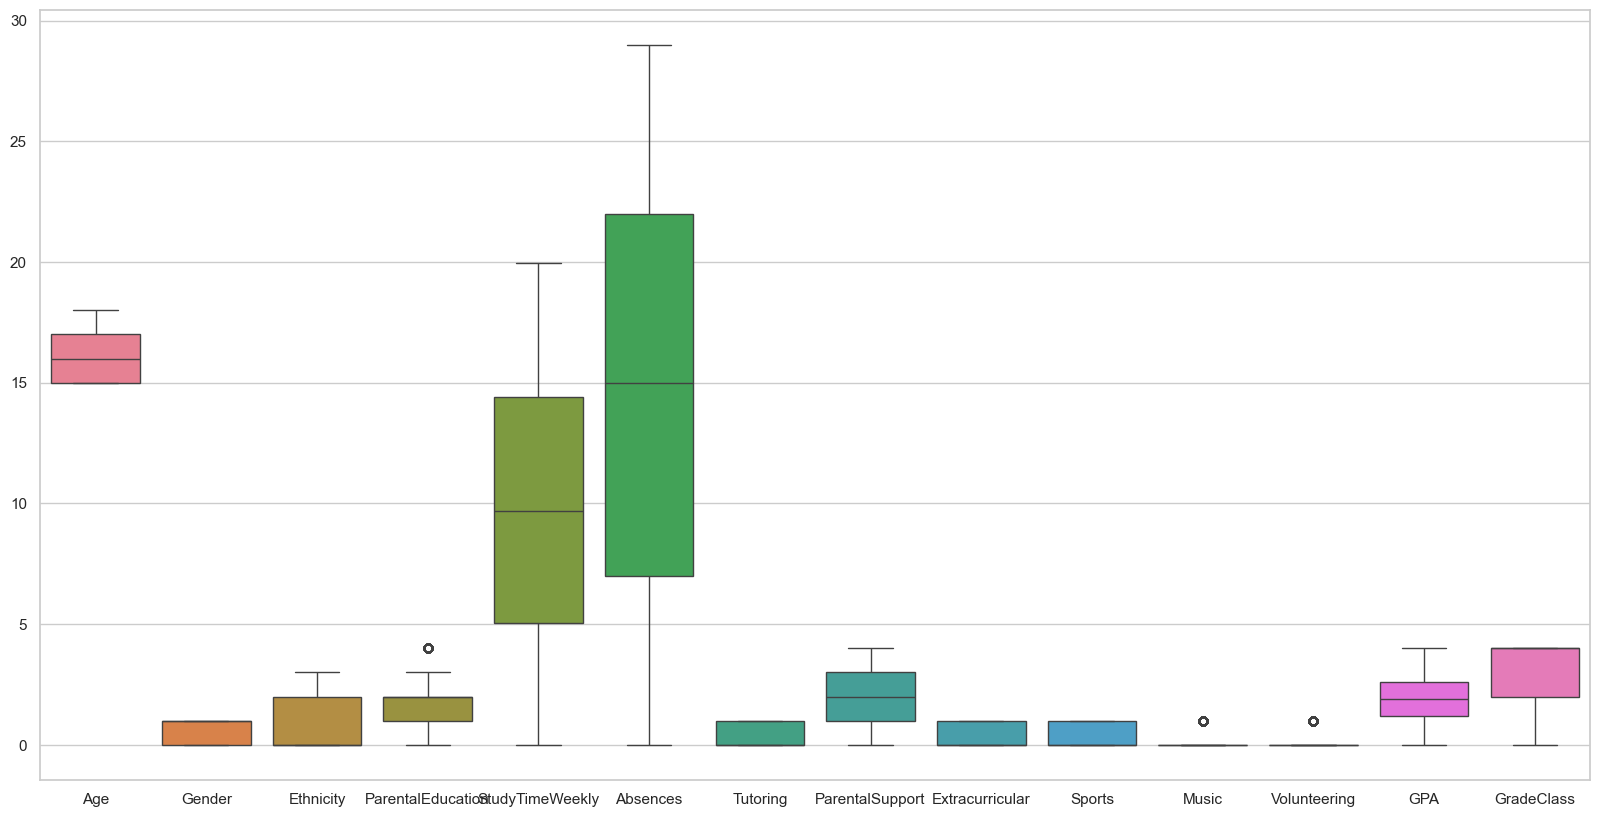

In [367]:
#scaling data to look better
df_scaled=df.drop("StudentID", axis=1)
#df_scaled.boxplot()
#pd.plotting.boxplot_frame(df_scaled)
sns.boxplot(data=df_scaled)

sns.set(
                           
        rc={"figure.figsize": (20, 10)      
            })  
plt.show()

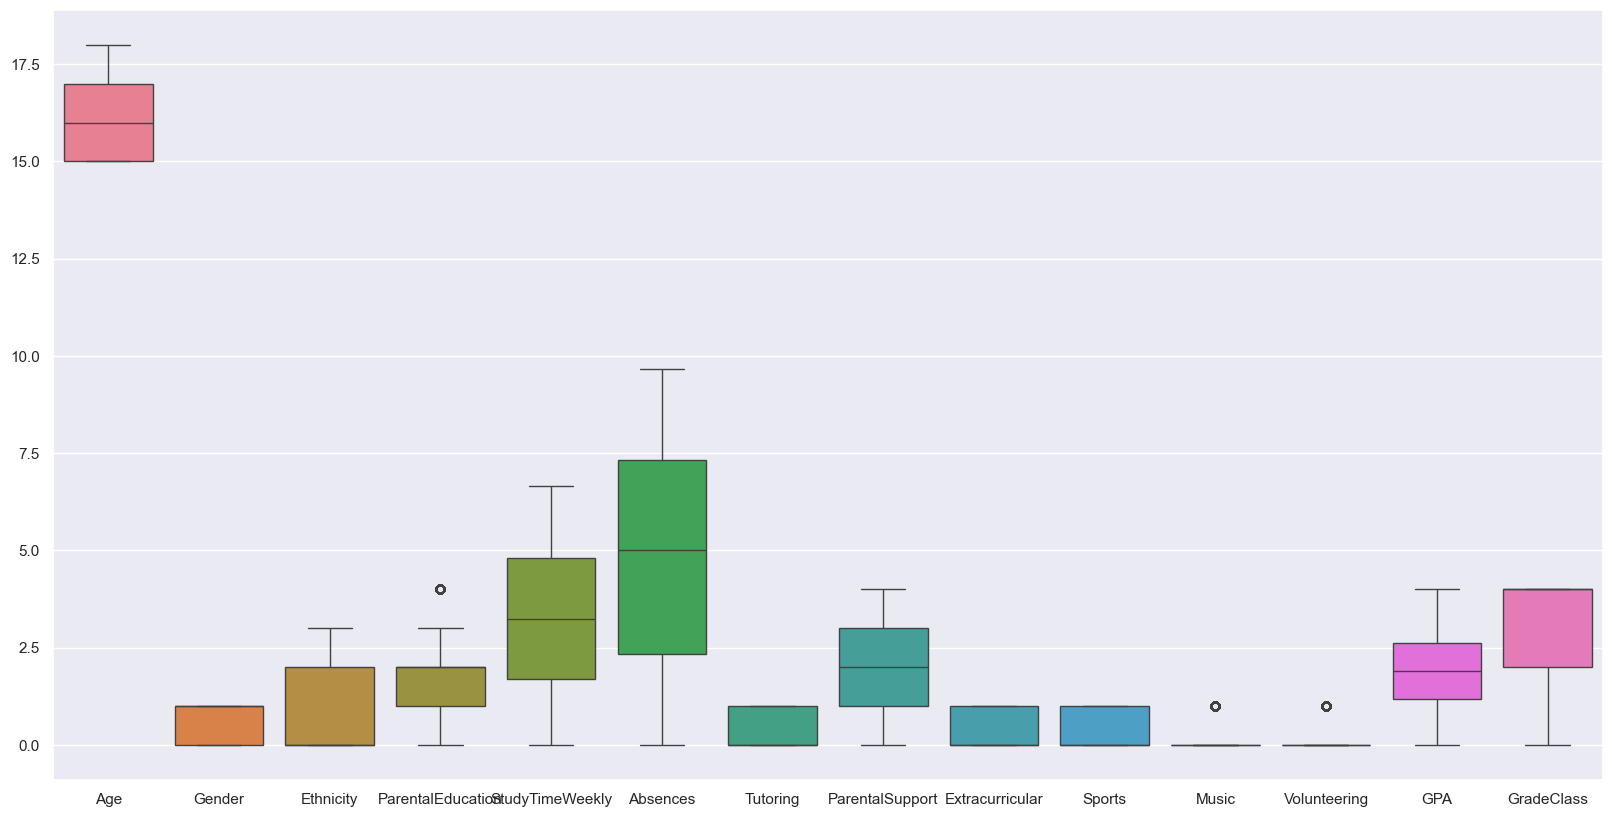

In [368]:
df_scaled["StudyTimeWeekly"] = df["StudyTimeWeekly"]/3
df_scaled["Absences"] = df["Absences"]/3
sns.boxplot(data=df_scaled)
plt.show()

In [369]:
# Maps for labels for better readability
df['GenderLabel'] = df['Gender'].map({0: 'Male', 1: 'Female'})
df['EthnicityLabel'] = df['Ethnicity'].map({0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'})
df['ParentalEducationLabel'] = df['ParentalEducation'].map({
    0: 'None', 1: 'High School', 2: 'Some College', 3: "Bachelor's", 4: 'Higher Study'
})
df['ParentalSupportLabel'] = df['ParentalSupport'].map({
    0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'
})
df['TutoringLabel'] = df['Tutoring'].map({0: 'No', 1: 'Yes'})
df['ExtracurricularLabel'] = df['Extracurricular'].map({0: 'No', 1: 'Yes'})
df['SportsLabel'] = df['Sports'].map({0: 'No', 1: 'Yes'})
df['MusicLabel'] = df['Music'].map({0: 'No', 1: 'Yes'})
df['VolunteeringLabel'] = df['Volunteering'].map({0: 'No', 1: 'Yes'})

Exploratory Data Analysis (EDA): Univariate analysis

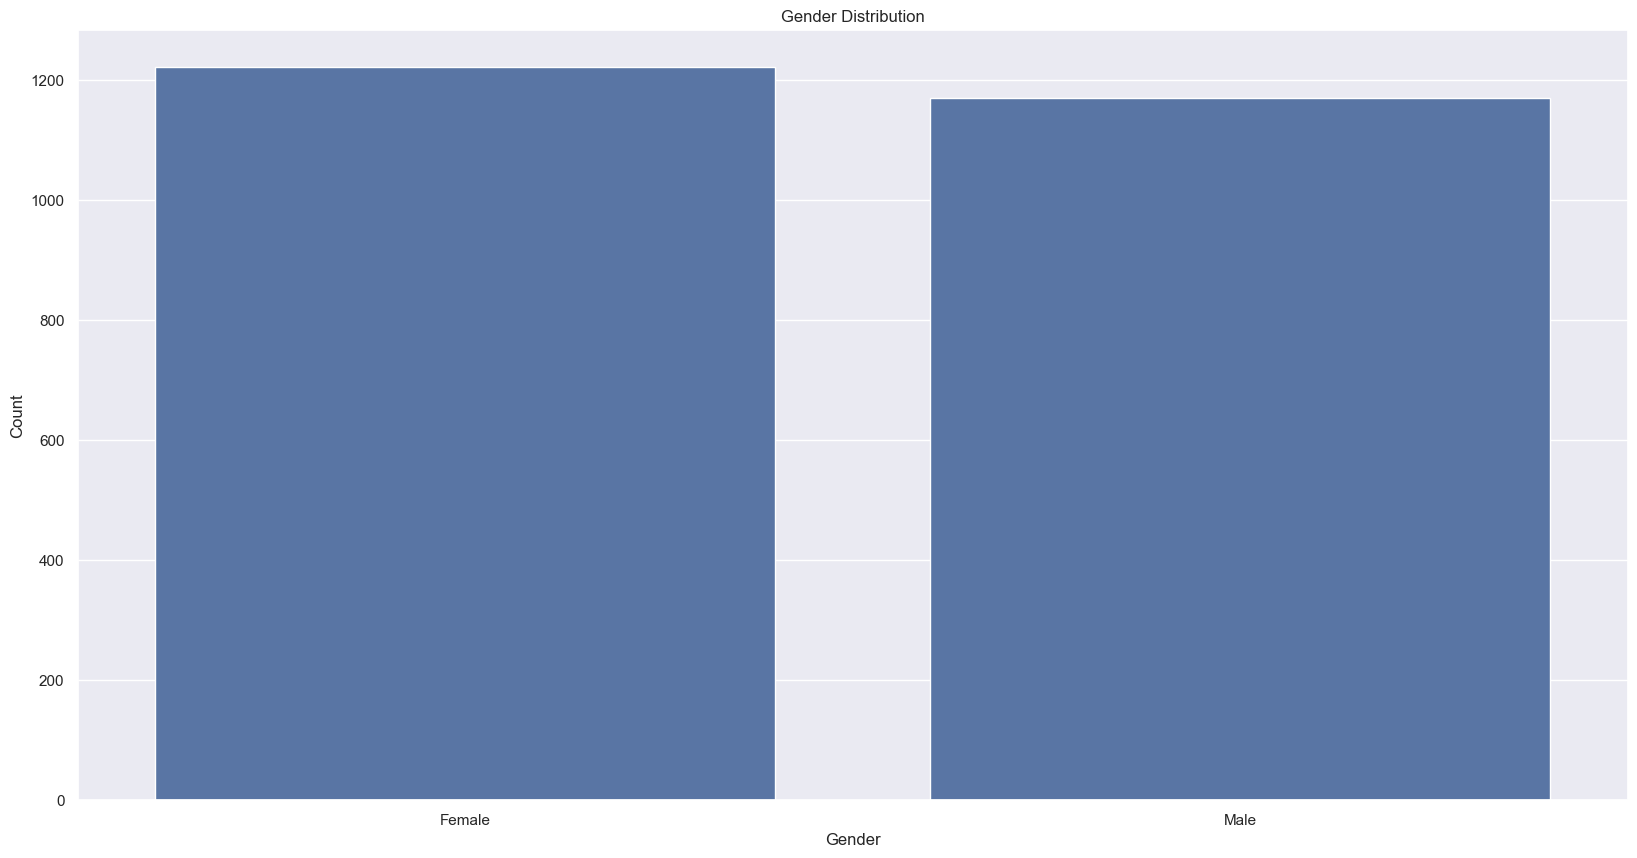

In [370]:
sns.countplot(x='GenderLabel', data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()
#More female than male students

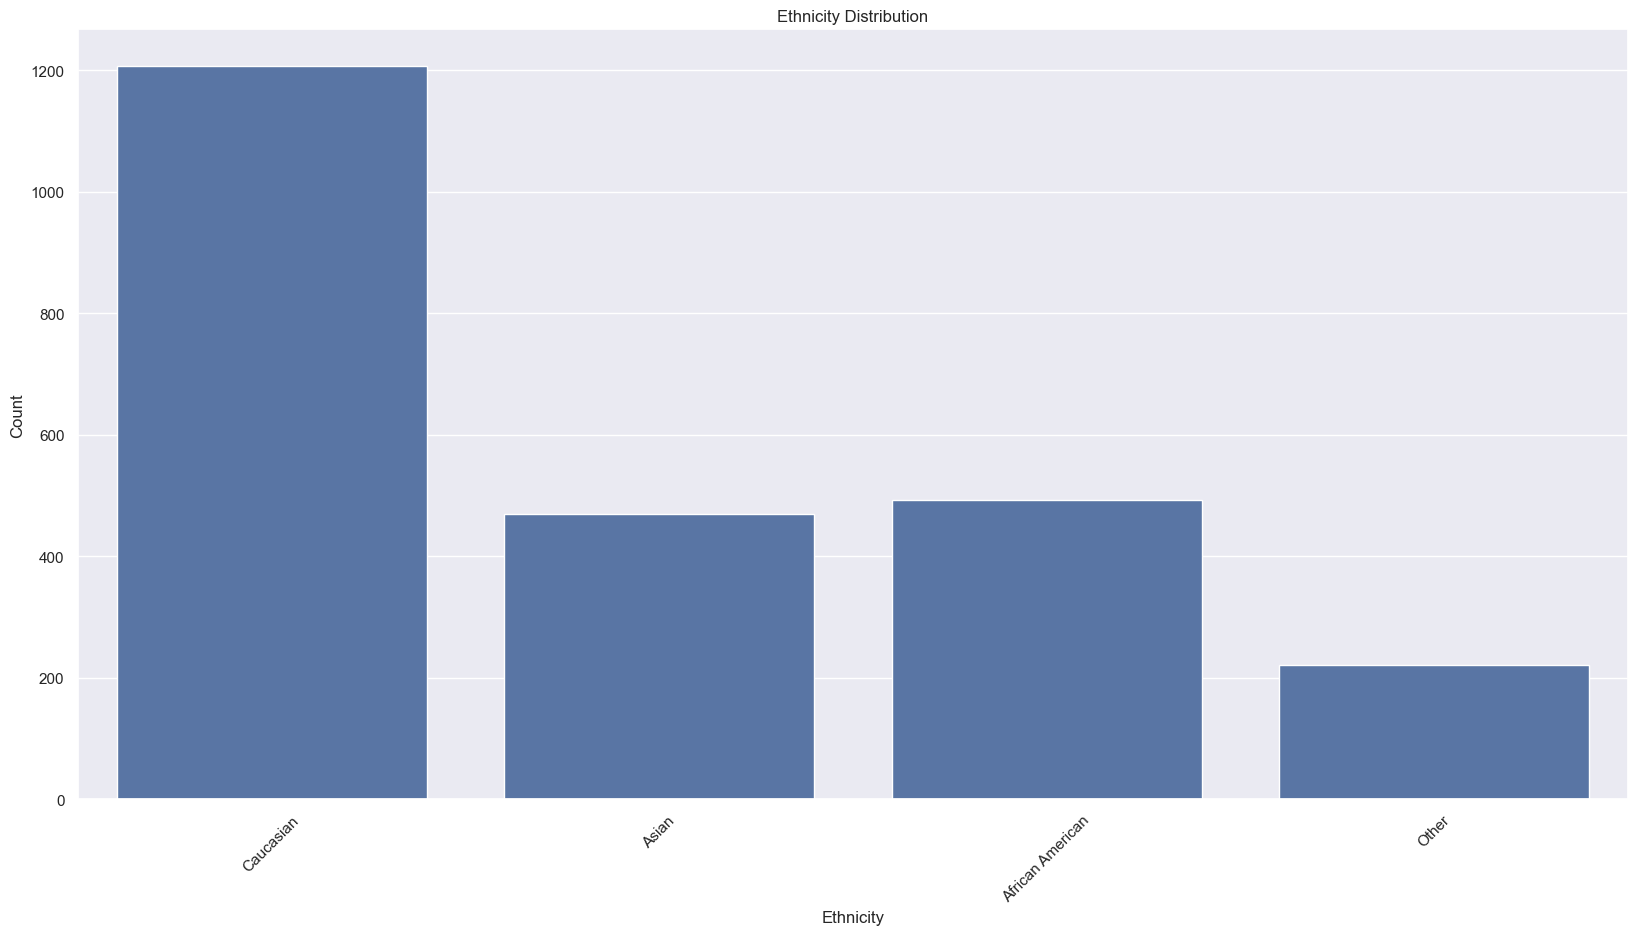

In [371]:
sns.countplot(x='EthnicityLabel', data=df)
plt.title("Ethnicity Distribution")
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
#More caucasians

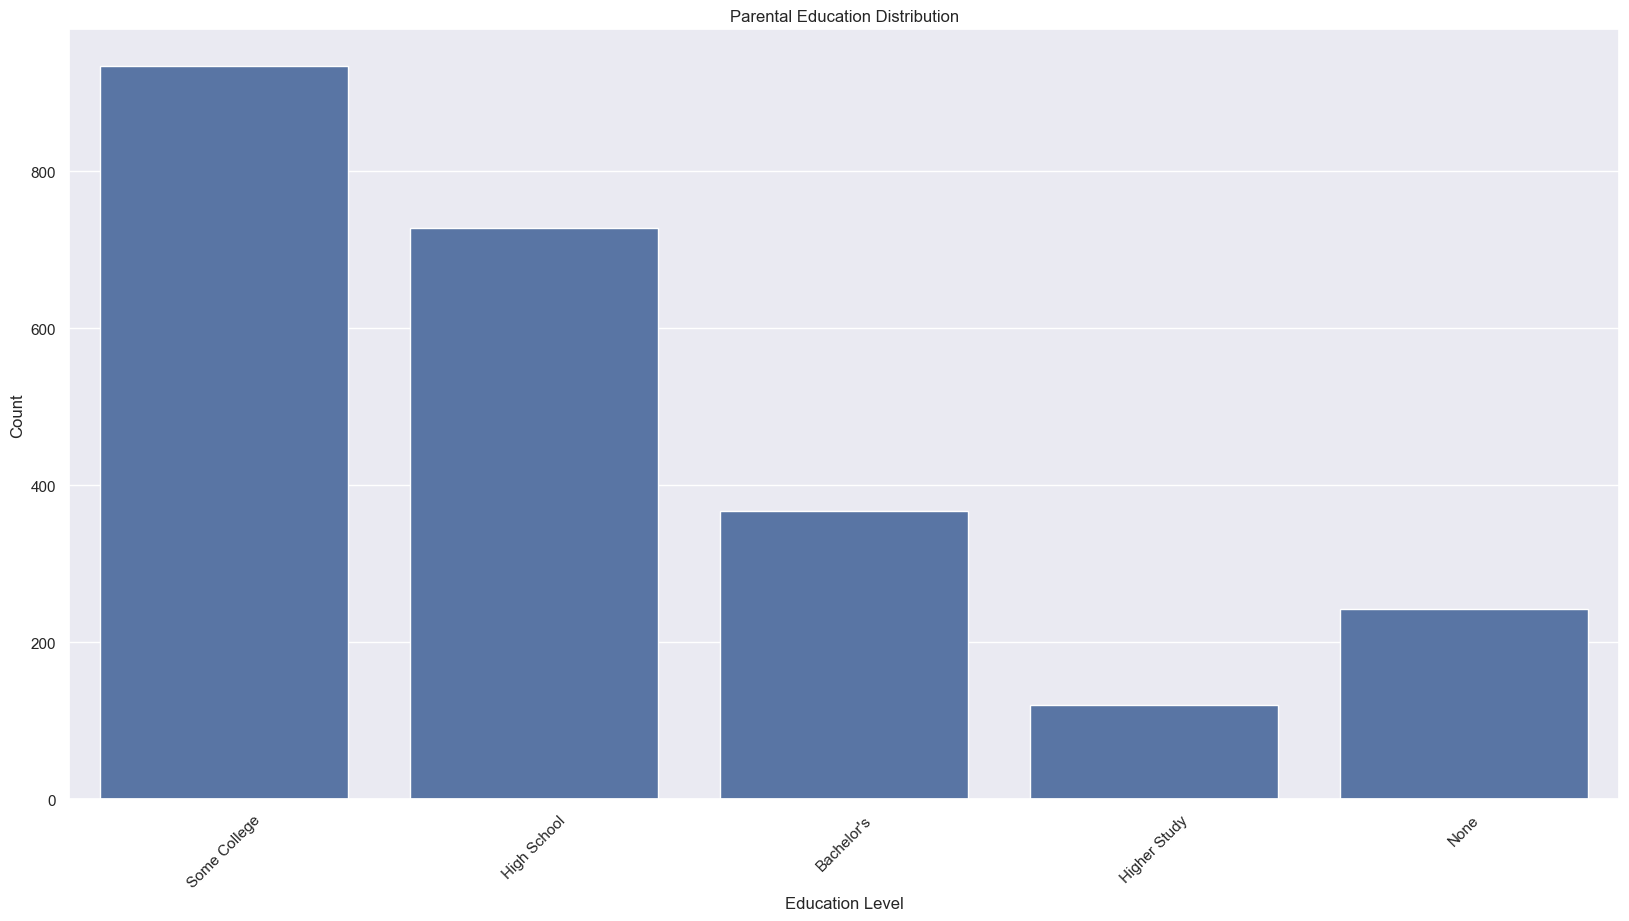

In [372]:
sns.countplot(x='ParentalEducationLabel', data=df)
plt.title("Parental Education Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
#Majority have an eductaion

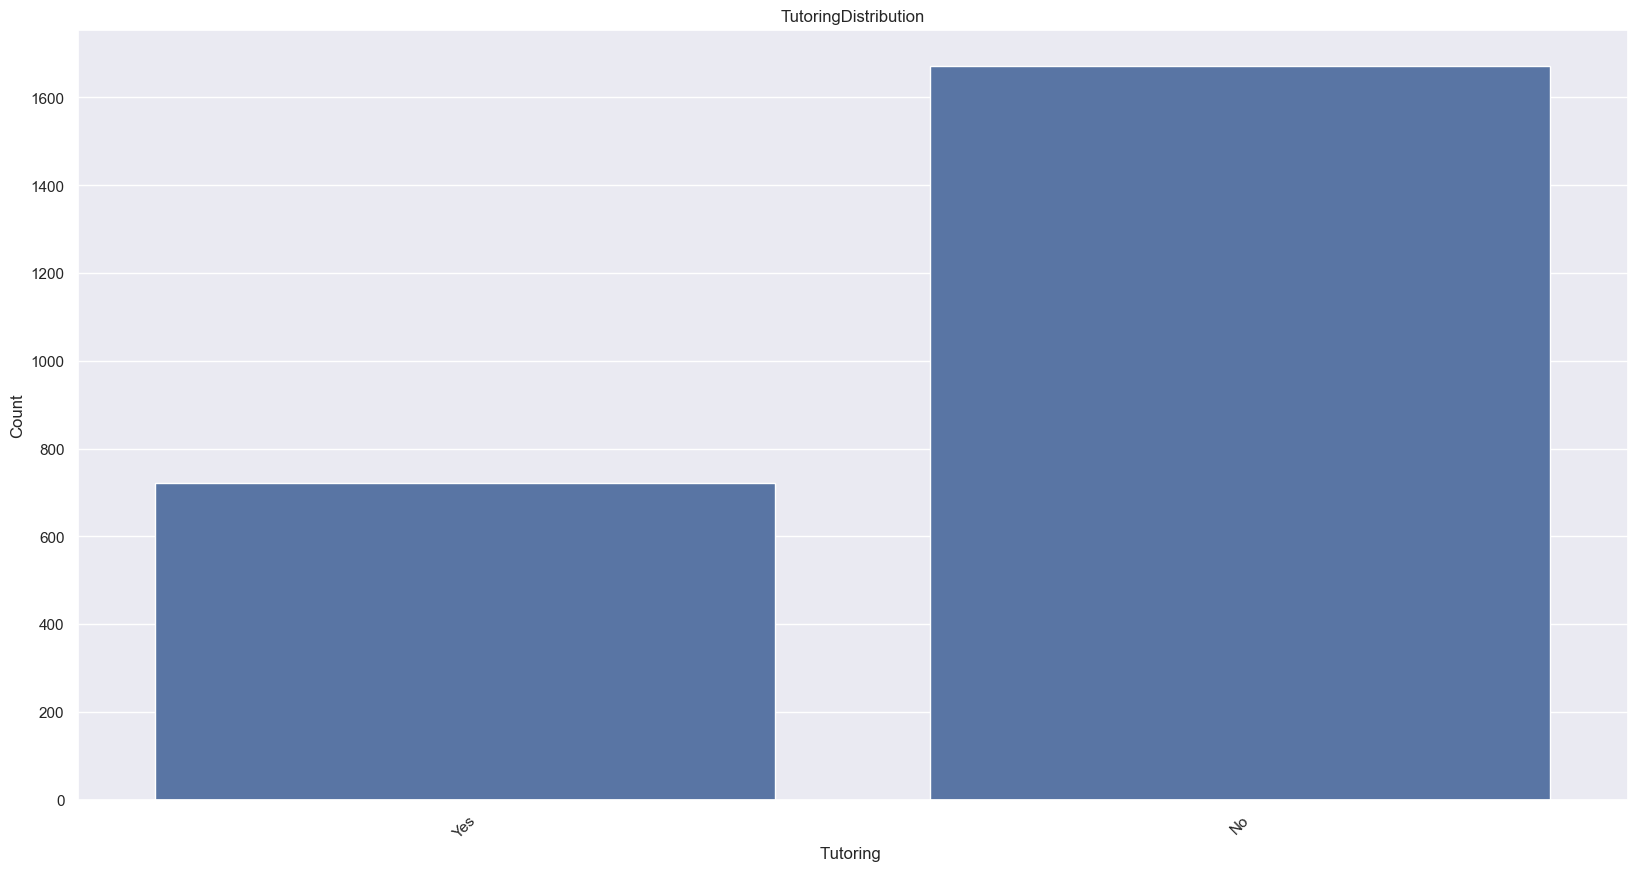

In [373]:
sns.countplot(x='TutoringLabel', data=df)
plt.title("TutoringDistribution")
plt.xlabel("Tutoring ")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
#majority dont have tutoring

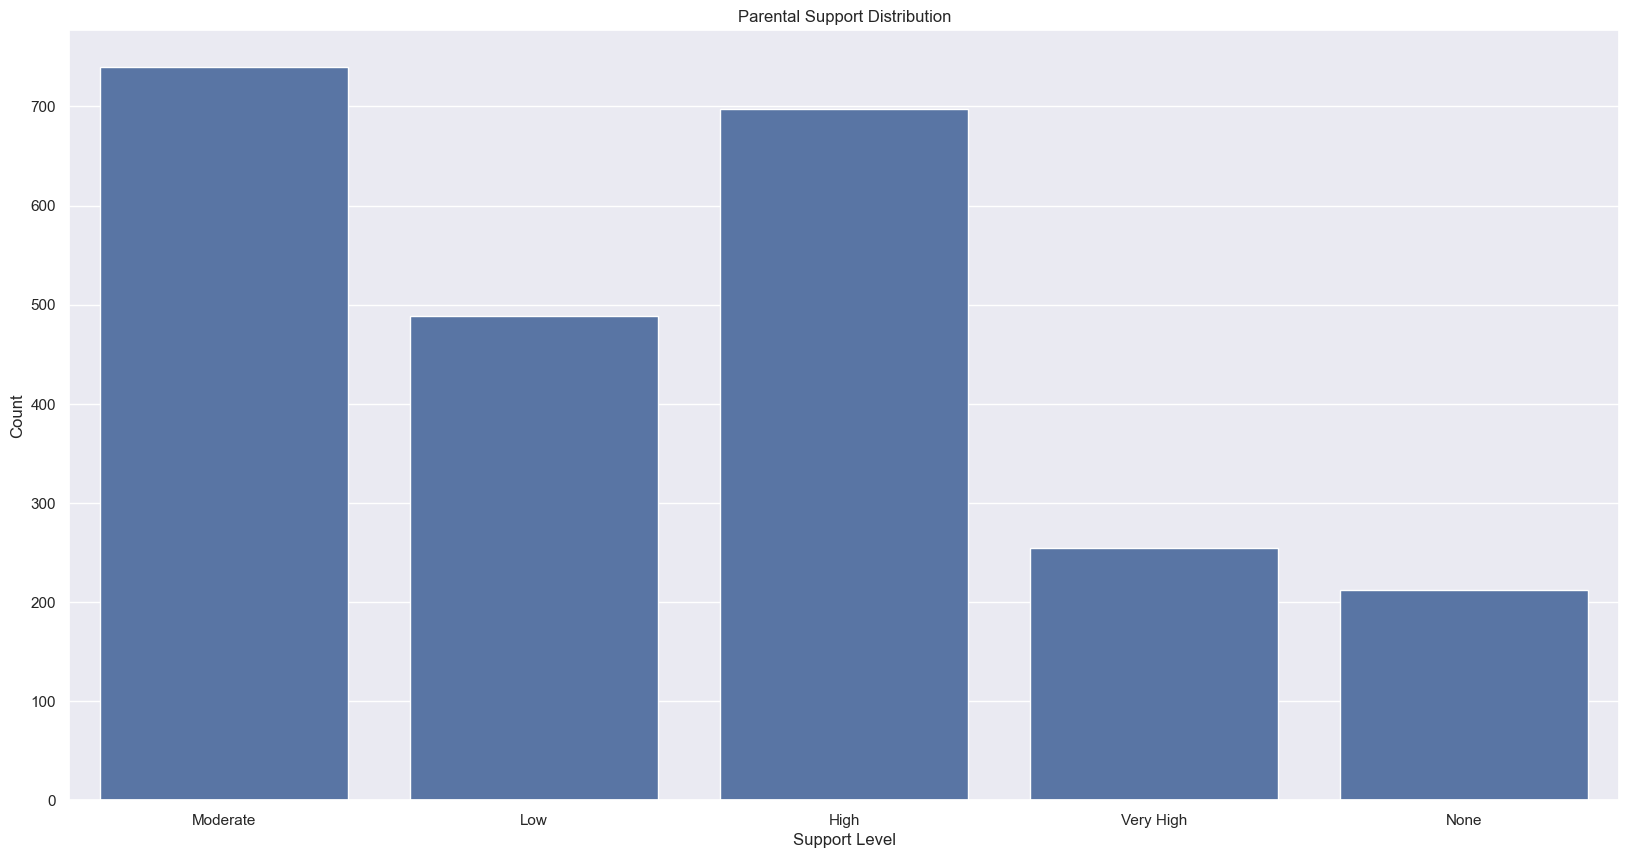

In [374]:
sns.countplot(x='ParentalSupportLabel', data=df)
plt.title("Parental Support Distribution")
plt.xlabel("Support Level")
plt.ylabel("Count")
plt.show()
#Data is varied

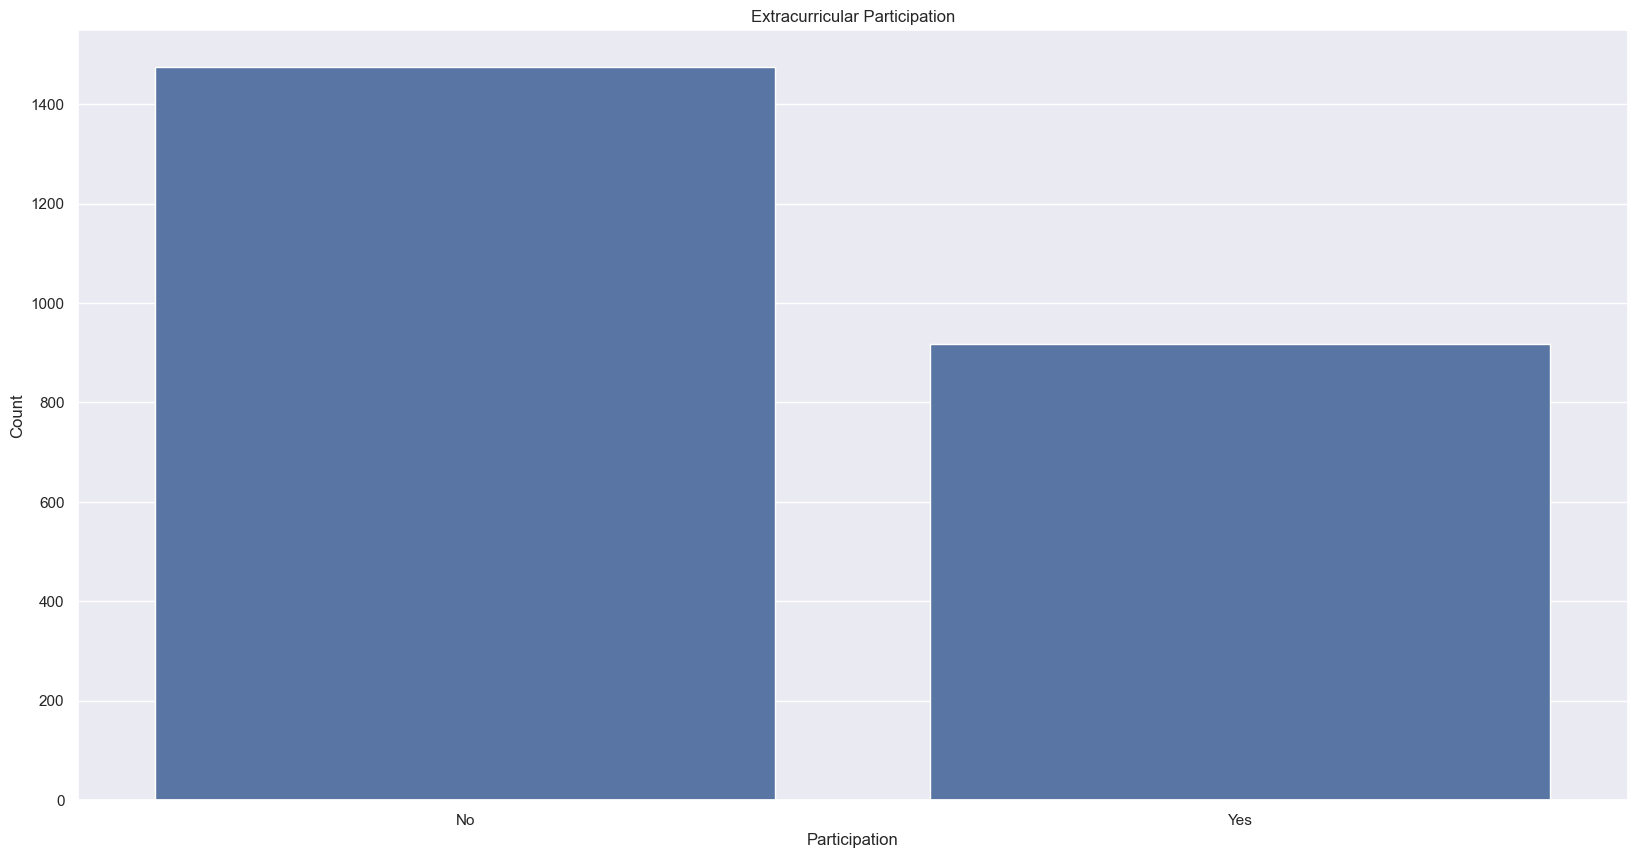

In [375]:
sns.countplot(x='ExtracurricularLabel', data=df)
plt.title("Extracurricular Participation")
plt.xlabel("Participation")
plt.ylabel("Count")
plt.show()
#Majority dont have extracurricular

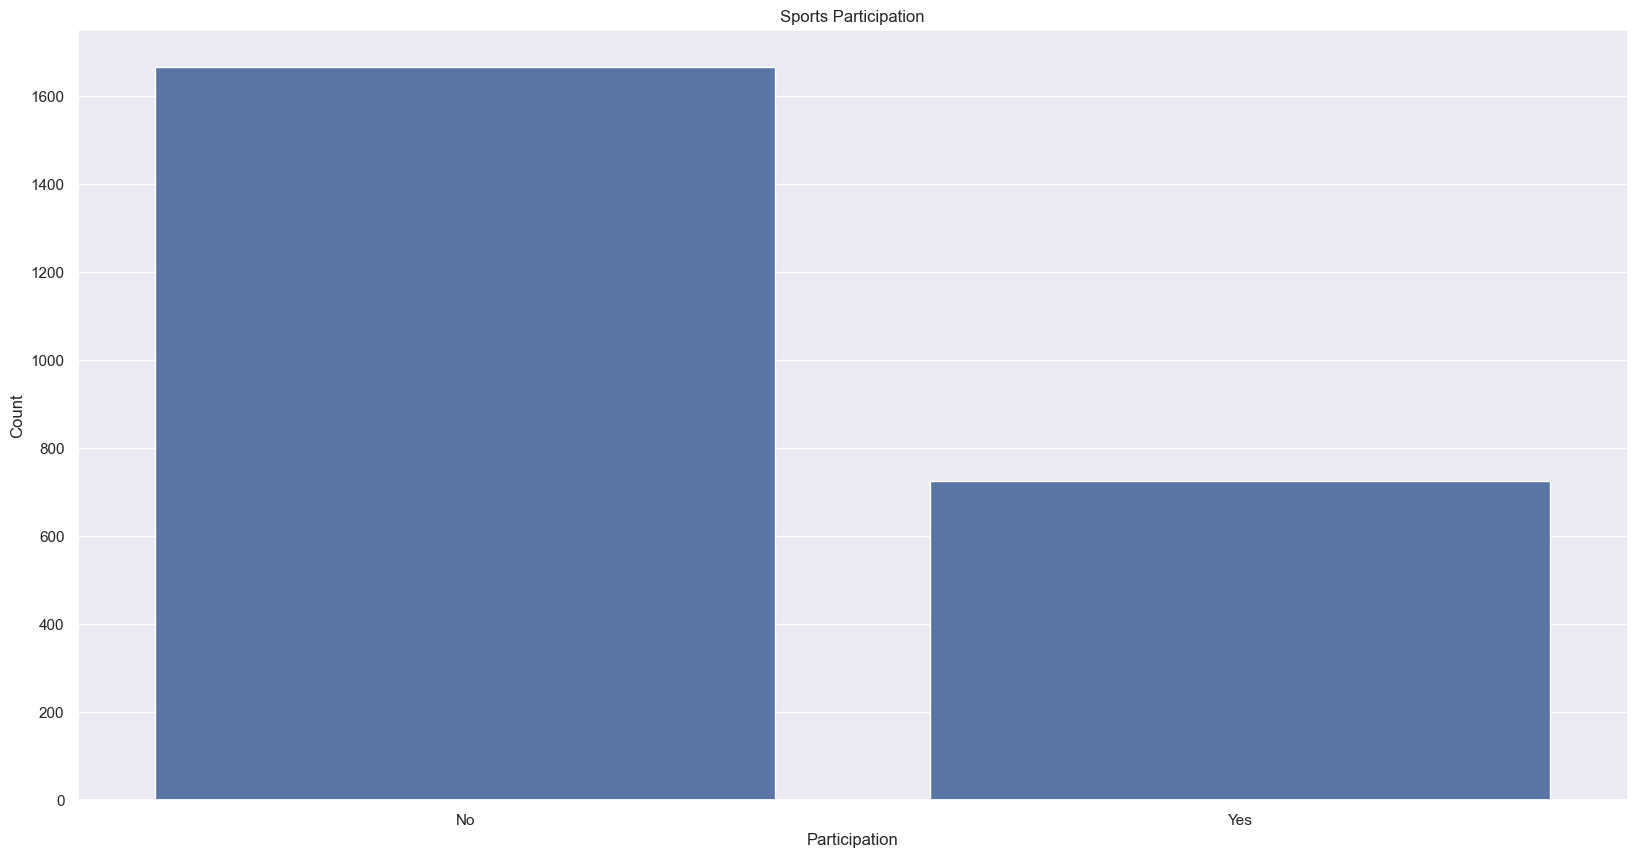

In [376]:
sns.countplot(x='SportsLabel', data=df)
plt.title("Sports Participation")
plt.xlabel("Participation")
plt.ylabel("Count")
plt.show()
#Majority dont take sports, most popular extracurricular

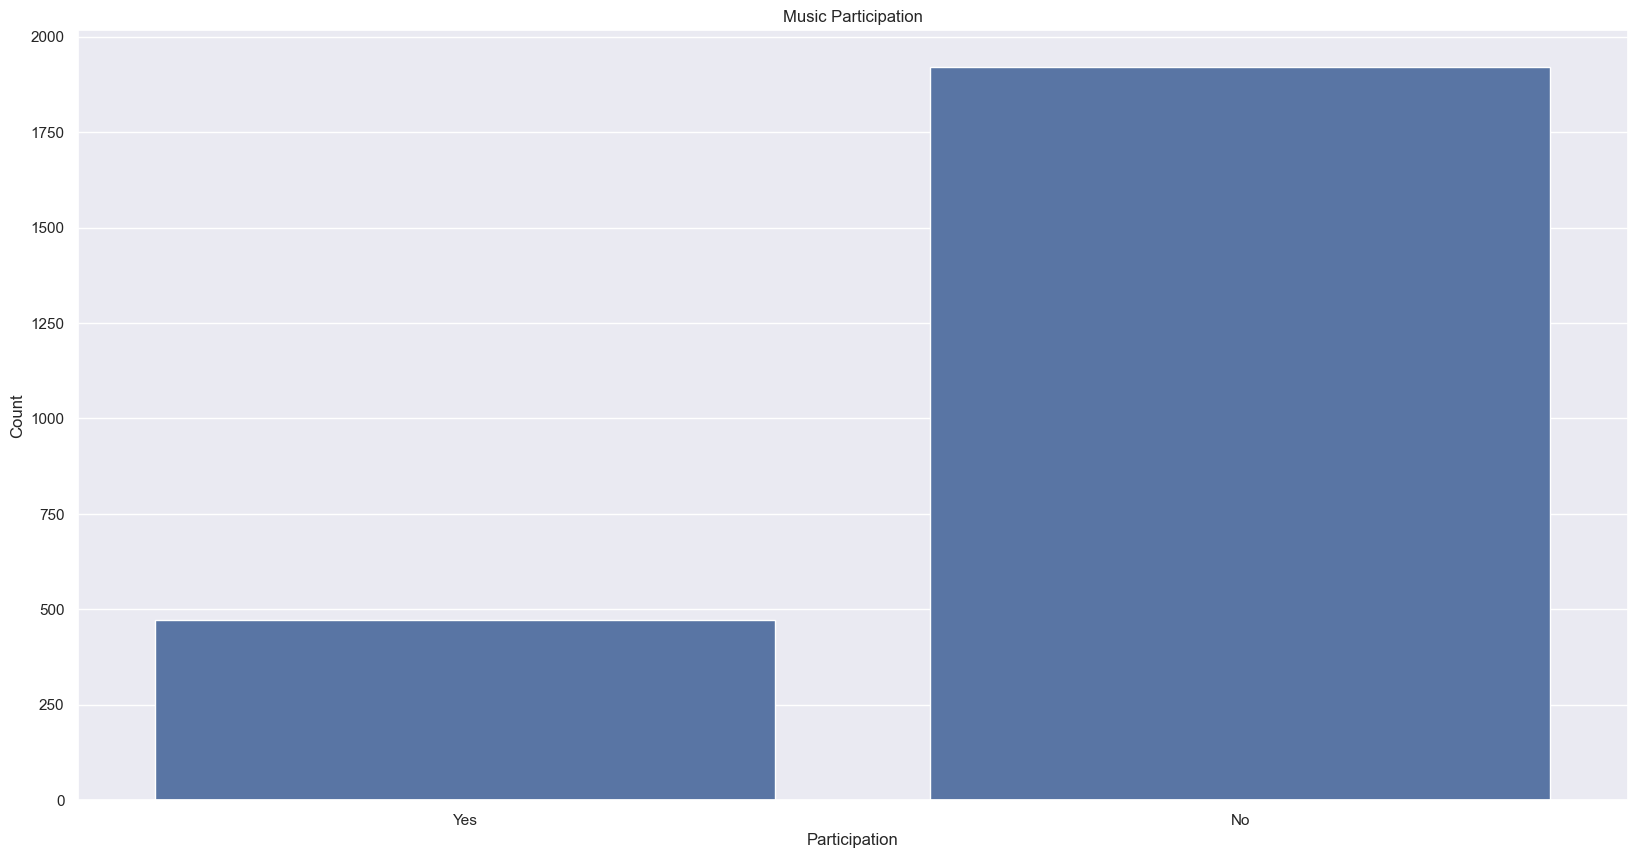

In [377]:
sns.countplot(x='MusicLabel', data=df)
plt.title("Music Participation")
plt.xlabel("Participation")
plt.ylabel("Count")
plt.show()
#Majority dont take music

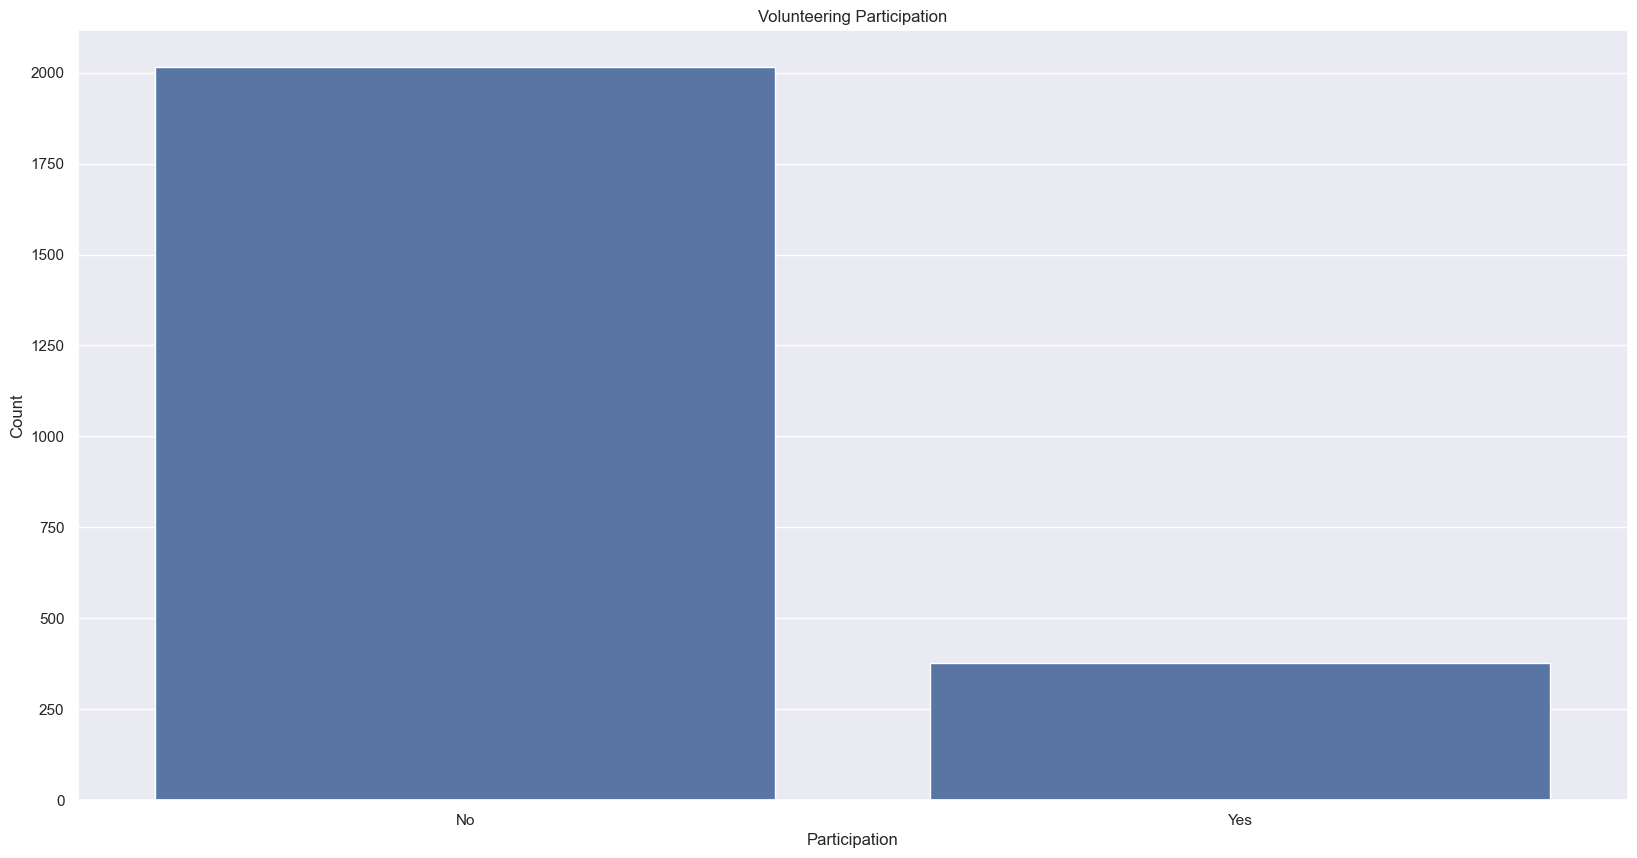

In [378]:
sns.countplot(x='VolunteeringLabel', data=df)
plt.title("Volunteering Participation")
plt.xlabel("Participation")
plt.ylabel("Count")
plt.show()
#Majority dont volunteer, voluntering is least chosen extracurricular

In [379]:
# Univariate: Numerical Features

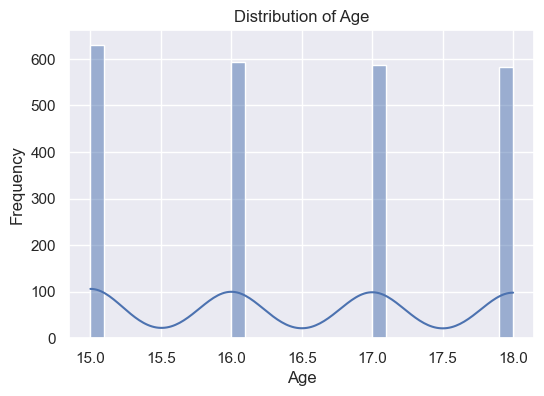

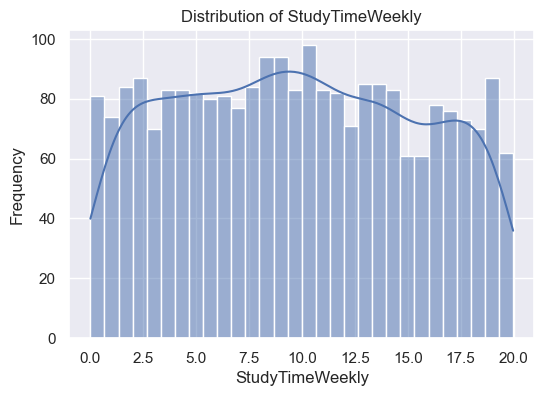

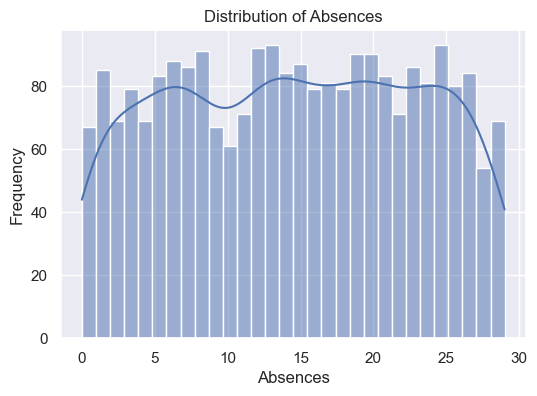

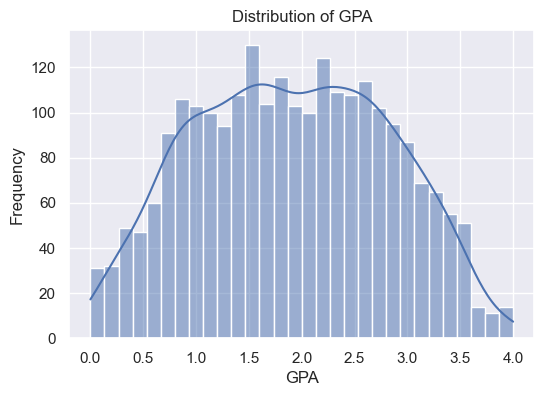

In [380]:
# Numerical variables distribution
for col in ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    #Age is uniform, slightly more 15 year olds
    #Study time has uniform distribution, slightly right skewed
    #Absences are uniform, slightly left skewed
    #Gpa has a normal distibution

In [381]:
#Making grade class
def classify_grade(gpa):
    if gpa >= 3.5:
        return 0  # A
    elif gpa >= 3.0:
        return 1  # B
    elif gpa >= 2.5:
        return 2  # C
    elif gpa >= 2.0:
        return 3  # D
    else:
        return 4  # F

# Apply the function to the GPA column
df['GradeClass'] = df['GPA'].apply(classify_grade)

# Add readable grade labels
grade_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'F'}
df['GradeClassLabel'] = df['GradeClass'].map(grade_map)
#Sort a to f
df['GradeClassLabel'] = pd.Categorical(df['GradeClassLabel'], categories=['A', 'B', 'C', 'D', 'F'], ordered=True)

In [382]:
# Bivariate analysis

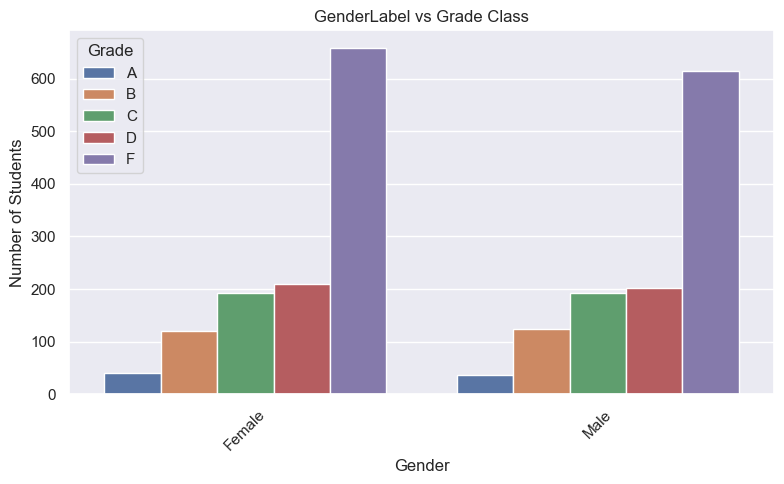

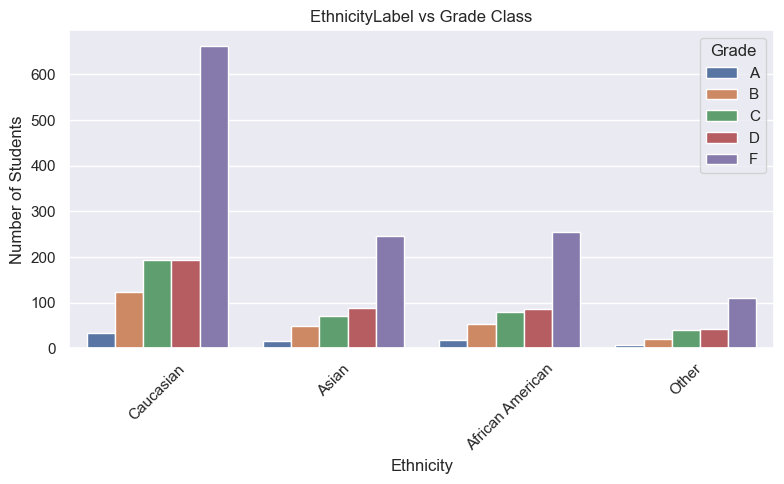

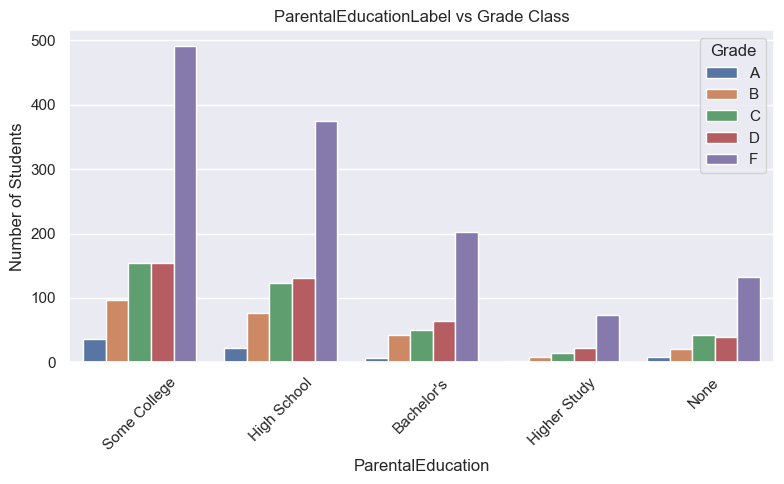

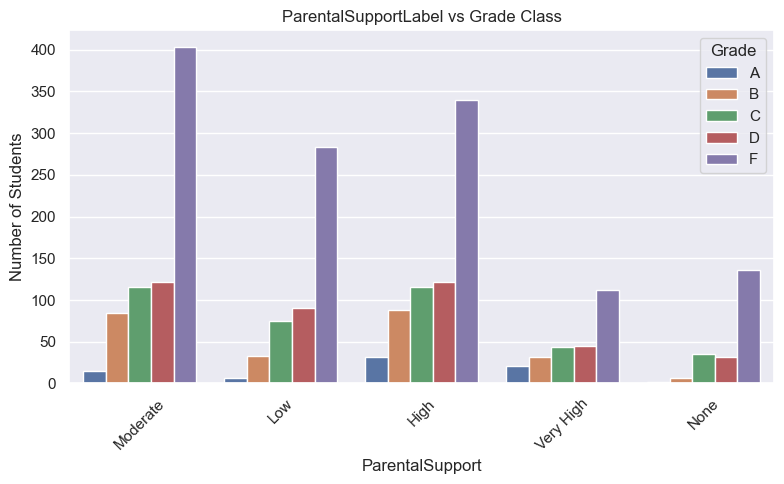

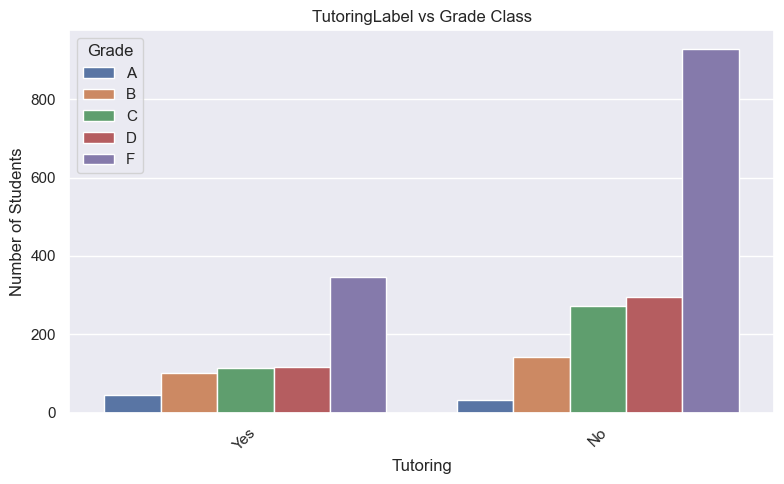

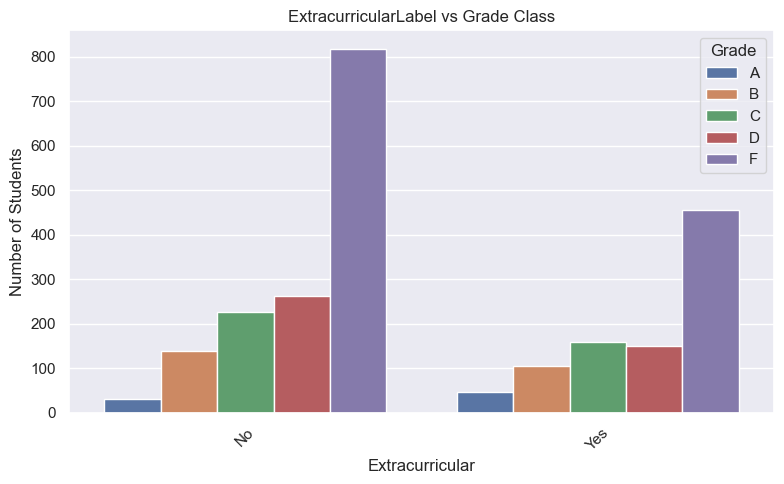

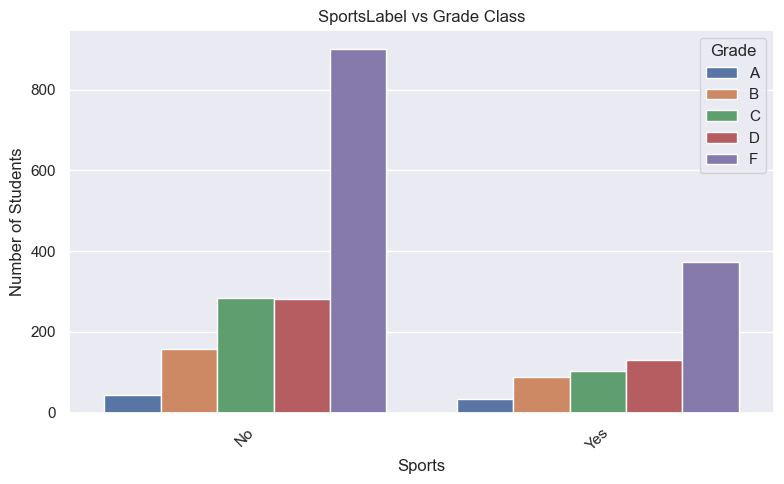

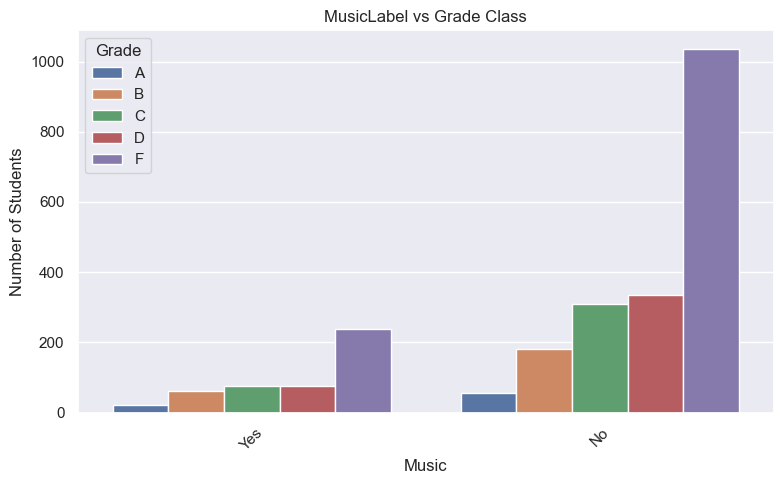

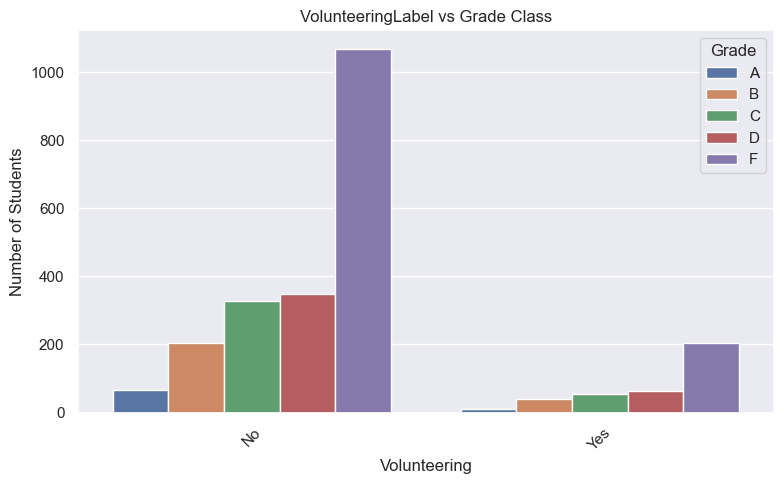

In [383]:
# Categorical vs GradeClass
categorical_labeled_columns = [
    'GenderLabel', 'EthnicityLabel', 'ParentalEducationLabel',
    'ParentalSupportLabel', 'TutoringLabel', 'ExtracurricularLabel',
    'SportsLabel', 'MusicLabel', 'VolunteeringLabel'
]

for col in categorical_labeled_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='GradeClassLabel', data=df)
    plt.title(f'{col} vs Grade Class')
    plt.xlabel(col.replace("Label", ""))
    plt.ylabel("Number of Students")
    plt.xticks(rotation=45)
    plt.legend(title='Grade')
    plt.tight_layout()
    plt.show()

In [384]:
plot_features = [
    ('GenderLabel', 'Gender'),
    ('EthnicityLabel', 'Ethnicity'),
    ('ParentalEducation', 'Parental Education Level (0=None, 4=Higher Study)'),
    ('ParentalSupport', 'Parental Support Level (0=None, 4=Very High)'),
    ('TutoringLabel', 'Tutoring'),
    ('ExtracurricularLabel', 'Extracurricular'),
    ('MusicLabel', 'Music'),
    ('SportsLabel', 'Sports'),
    ('VolunteeringLabel', 'Volunteering')
]

C:\Users\jeane\AppData\Local\Temp\ipykernel_11276\118500328.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='GPA', data=df, palette="pastel")


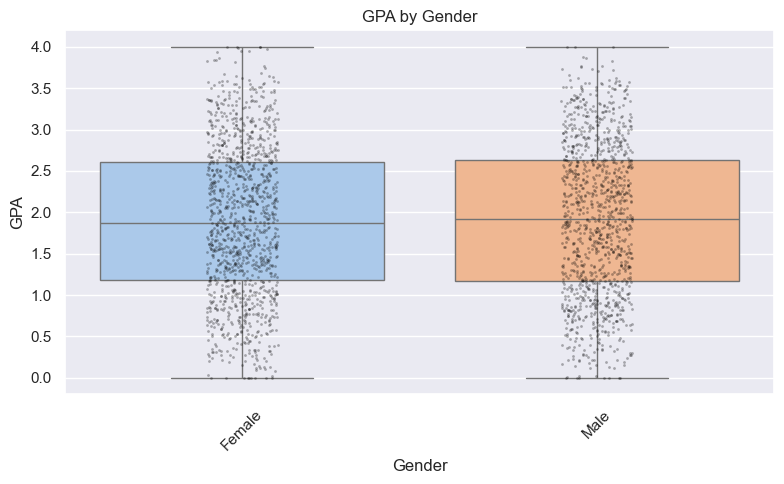

C:\Users\jeane\AppData\Local\Temp\ipykernel_11276\118500328.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='GPA', data=df, palette="pastel")


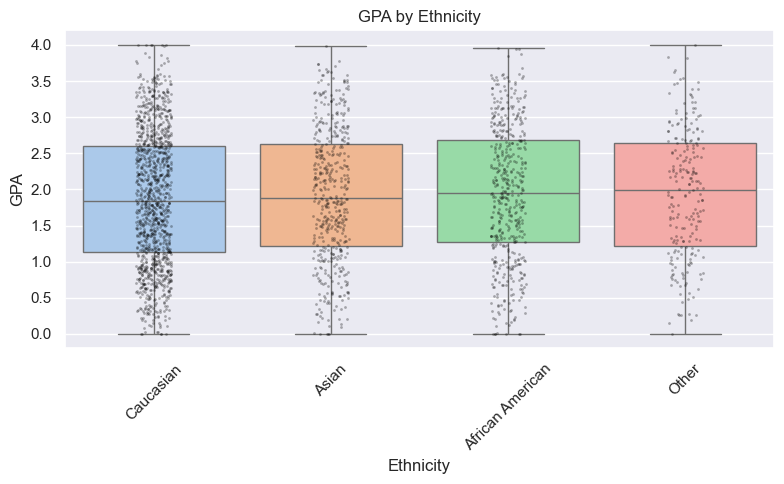

C:\Users\jeane\AppData\Local\Temp\ipykernel_11276\118500328.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='GPA', data=df, palette="pastel")


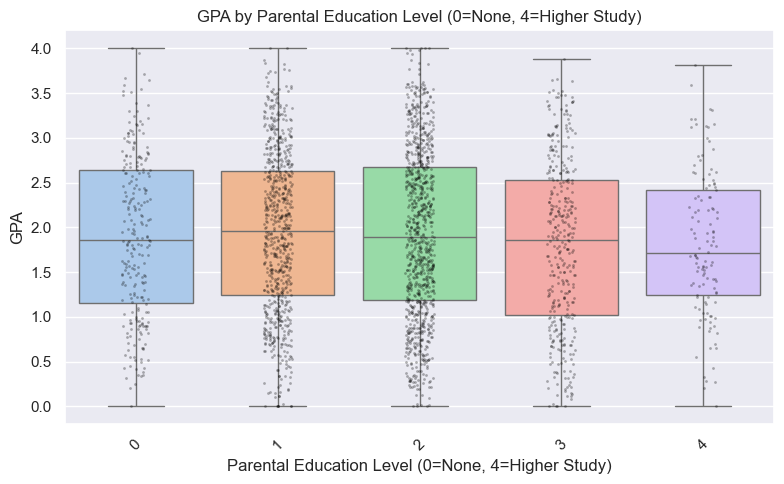

C:\Users\jeane\AppData\Local\Temp\ipykernel_11276\118500328.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='GPA', data=df, palette="pastel")


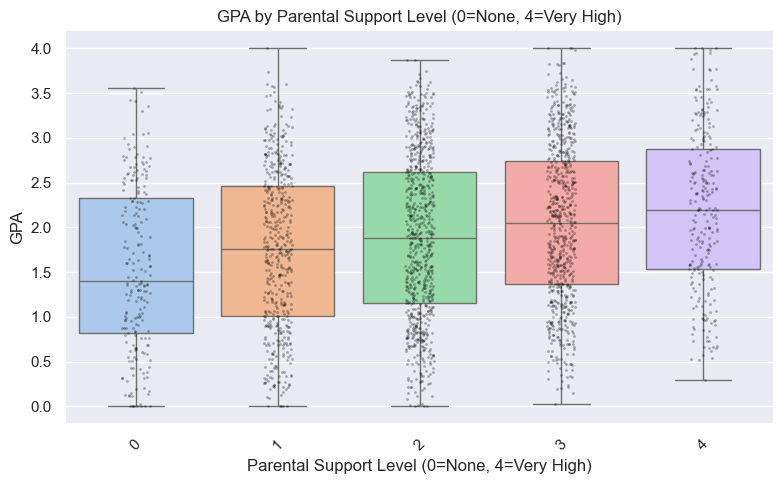

C:\Users\jeane\AppData\Local\Temp\ipykernel_11276\118500328.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='GPA', data=df, palette="pastel")


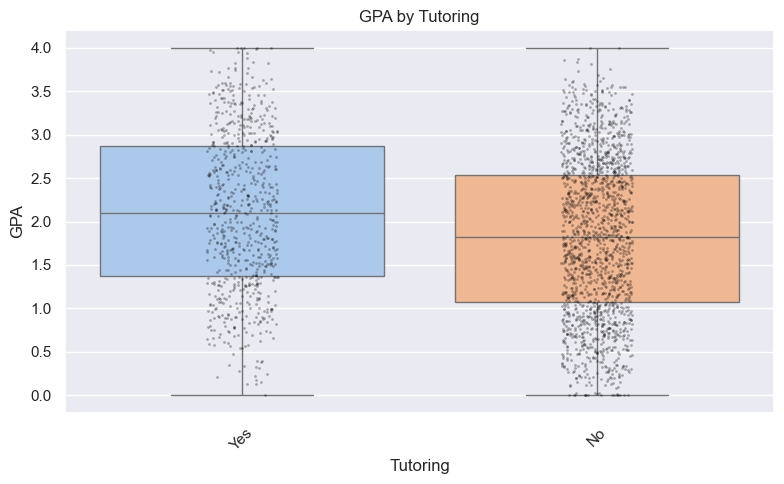

C:\Users\jeane\AppData\Local\Temp\ipykernel_11276\118500328.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='GPA', data=df, palette="pastel")


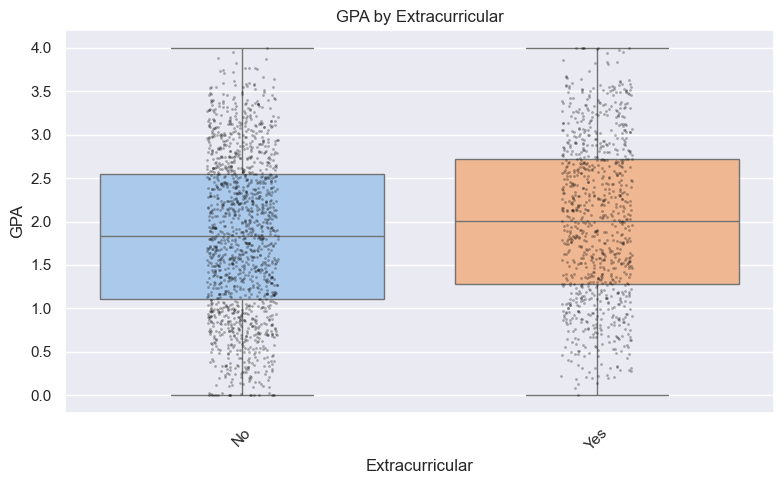

C:\Users\jeane\AppData\Local\Temp\ipykernel_11276\118500328.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='GPA', data=df, palette="pastel")


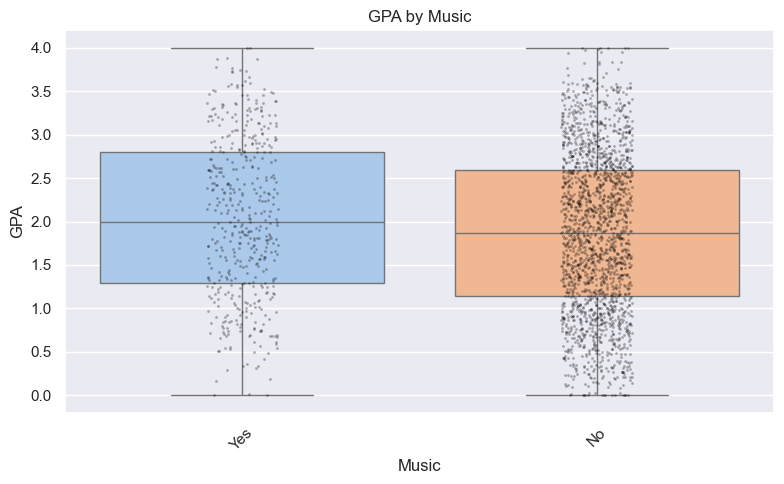

C:\Users\jeane\AppData\Local\Temp\ipykernel_11276\118500328.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='GPA', data=df, palette="pastel")


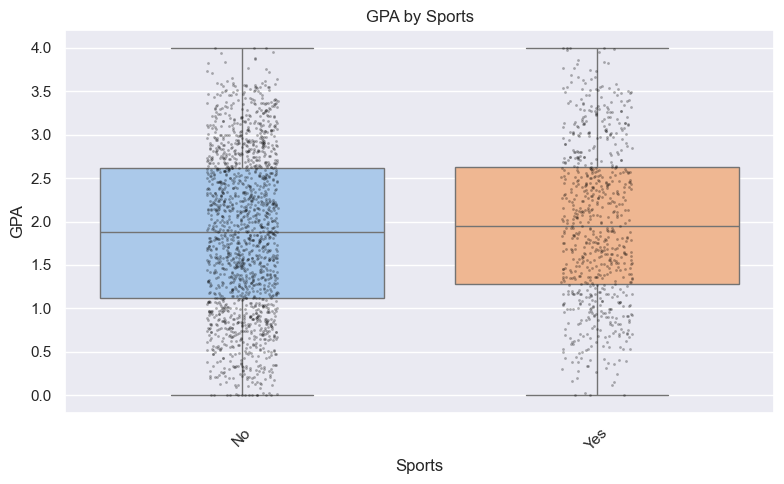

C:\Users\jeane\AppData\Local\Temp\ipykernel_11276\118500328.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='GPA', data=df, palette="pastel")


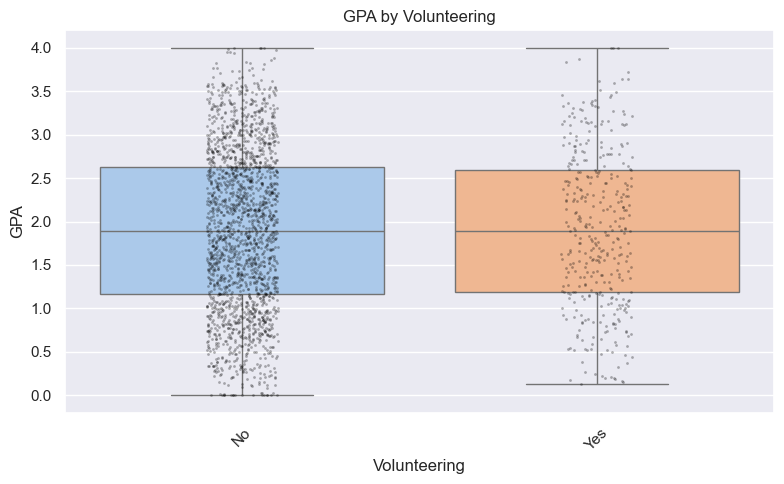

In [385]:
#Different way to look at data
for feature, label in plot_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=feature, y='GPA', data=df, palette="pastel")
    sns.stripplot(x=feature, y='GPA', data=df, color='black', size=2, jitter=True, alpha=0.3)
    plt.title(f"GPA by {label}")
    plt.xlabel(label)
    plt.ylabel("GPA")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Observations

In [386]:
# Observations:

#Gender vs GPA
# Observation:
# Female students (Gender = 1) show a slightly higher median GPA and narrower spread,
# suggesting better overall academic consistency compared to male students.

#Ethnicity vs GPA
# Observation:
# There is visible variation across ethnic groups. Some groups show tighter GPA clusters
# around higher values, indicating potential differences in performance that could be
# explored further with support and engagement factors.

#Parental Education vs GPA
# Observation:
# Students whose parents have higher education levels tend to have higher GPAs.
# The GPA distribution shifts upward with increasing parental education, suggesting
# parental academic background plays a role in student success.

#Parental Support vs GPA
# Observation:
# GPA tends to increase with higher levels of parental support.
# The violin plot shows wider GPA distributions for students with little or no support,
# and tighter, higher distributions with high support.

#Tutoring vs GPA
# Observation:
# Students receiving tutoring (Tutoring = 1) have a higher median GPA.
# This supports the effectiveness of academic intervention strategies.

#Extracurricular vs GPA
# Observation:
# Students involved in extracurricular activities show a slightly higher GPA median,
# though the overall impact appears moderate. Participation may support balanced development.

#Music vs GPA
# Observation:
# Students participating in music show higher GPA medians compared to non-participants.
# This may reflect benefits of discipline, structure, or creativity linked with music.

#Sports vs GPA
# Observation:
# Sports participation shows mixed results. The GPA distribution is wide for both groups,
# indicating that athletic involvement doesn’t strongly correlate with academic outcomes alone.

#Volunteering vs GPA
# Observation:
# Students who volunteer show a slightly higher GPA median, though the effect is subtle.
# Volunteering may indirectly support academic performance through skill development.

In [387]:
# Numerical vs GradeClass

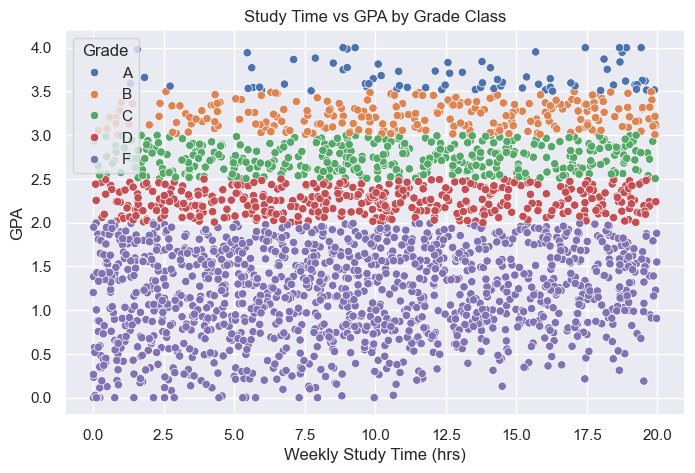

In [388]:
# Numerical vs GradeClass
plt.figure(figsize=(8, 5))
sns.scatterplot(x='StudyTimeWeekly', y='GPA', hue='GradeClassLabel', data=df)
plt.title("Study Time vs GPA by Grade Class")
plt.xlabel("Weekly Study Time (hrs)")
plt.ylabel("GPA")
plt.legend(title="Grade")
plt.grid(True)
plt.show()

# Observation:
# Students who dedicate more hours to weekly study generally achieve higher GPAs.
# There is a clear positive trend though with some spread 
# So while more study time helps, quality and other factors also play a role.

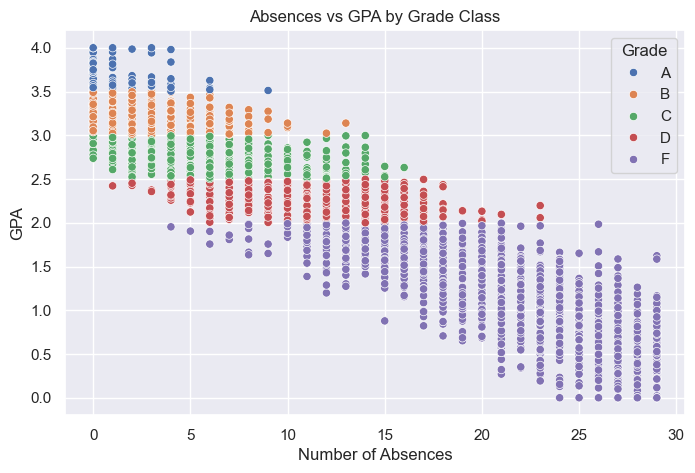

In [389]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Absences', y='GPA', hue='GradeClassLabel', data=df)
plt.title("Absences vs GPA by Grade Class")
plt.xlabel("Number of Absences")
plt.ylabel("GPA")
plt.legend(title="Grade")
plt.grid(True)
plt.show()

# Observation:
# A noticeable negative relationship exists between absences and GPA.
# Students with frequent absences tend to have lower GPA scores,
# highlighting that consistent attendance is important for academic success.

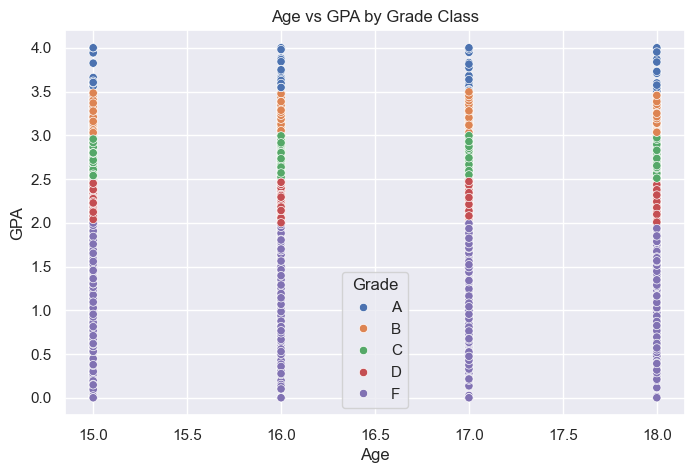

In [390]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='GPA', hue='GradeClassLabel', data=df)
plt.title("Age vs GPA by Grade Class")
plt.xlabel("Age")
plt.ylabel("GPA")
plt.legend(title="Grade")
plt.grid(True)
plt.show()

# Observation:
# The majority of students are between 15 and 18 years old.
# GPA distributions across this age range appear relatively uniform,
# suggesting age does not have a strong linear impact on academic performance.

In [391]:
# Correlation analysis

Correlation between GPA and Study Time Weekly: 0.18


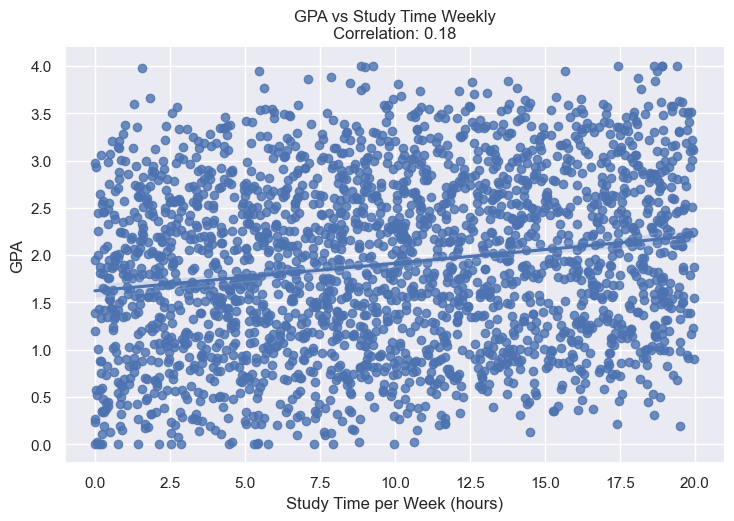

In [392]:
# Calculate correlation
correlation_study = df['GPA'].corr(df['StudyTimeWeekly'])
print(f"Correlation between GPA and Study Time Weekly: {correlation_study:.2f}")

# Plot with regression line
sns.lmplot(x='StudyTimeWeekly', y='GPA', data=df, aspect=1.5, height=5)
plt.title(f'GPA vs Study Time Weekly\nCorrelation: {correlation_study:.2f}')
plt.xlabel('Study Time per Week (hours)')
plt.ylabel('GPA')
plt.grid(True)
plt.show()

# Observation:
# There is a positive correlation between study time and GPA.
# As students spend more hours studying each week, their GPA tends to increase.
# However, the correlation is moderate 0.18, suggesting that
# while study time matters, other factors like study effectiveness or support also play a role.

Correlation between GPA and Absences: -0.92


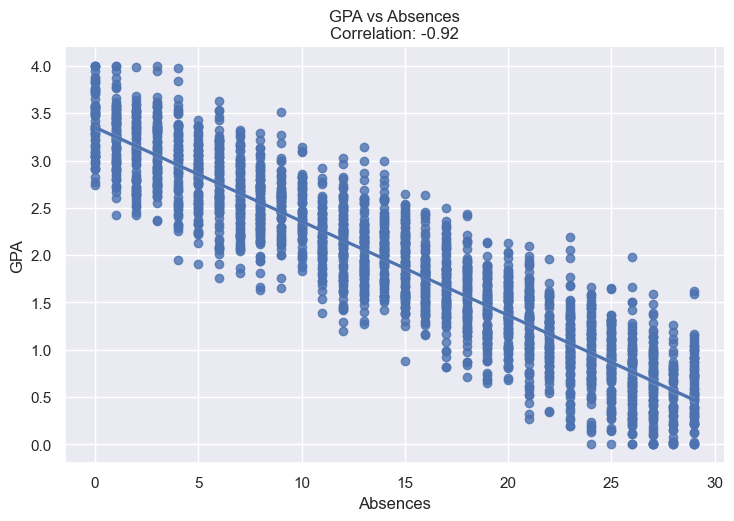

In [393]:
correlation_absences = df['GPA'].corr(df['Absences'])
print(f"Correlation between GPA and Absences: {correlation_absences:.2f}")

sns.lmplot(x='Absences', y='GPA', data=df, aspect=1.5, height=5)
plt.title(f'GPA vs Absences\nCorrelation: {correlation_absences:.2f}')
plt.xlabel('Absences')
plt.ylabel('GPA')
plt.grid(True)
plt.show()

# Observation:
# This relationship shows a negative correlation students with more absences generally have lower GPAs.
# The trend line clearly slopes downward, indicating that consistent attendance contributes to academic success.


Correlation between GPA and Age: 0.00


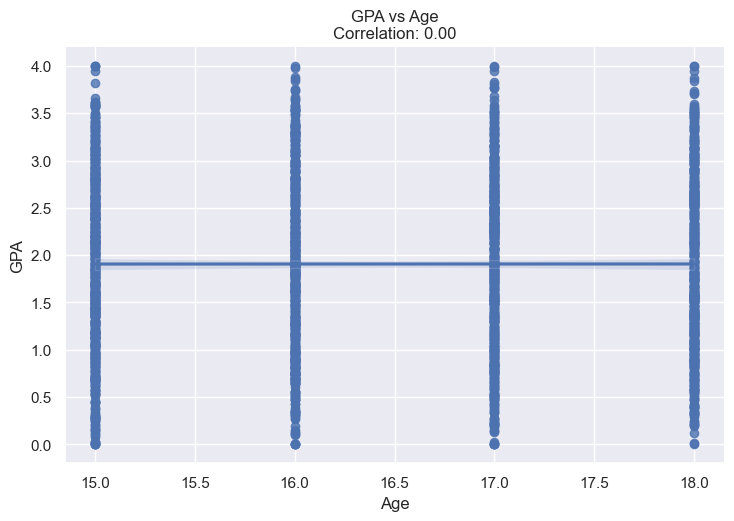

In [394]:
correlation_age = df['GPA'].corr(df['Age'])
print(f"Correlation between GPA and Age: {correlation_age:.2f}")

sns.lmplot(x='Age', y='GPA', data=df, aspect=1.5, height=5)
plt.title(f'GPA vs Age\nCorrelation: {correlation_age:.2f}')
plt.xlabel('Age')
plt.ylabel('GPA')
plt.grid(True)
plt.show()

# Observation:
# The correlation between GPA and age is weak or nearly flat.
# This suggests that age within the 15–18 range in this dataset has minimal effect on academic performance.
# GPA appears to be influenced more by behavioral and support factors than age alone.


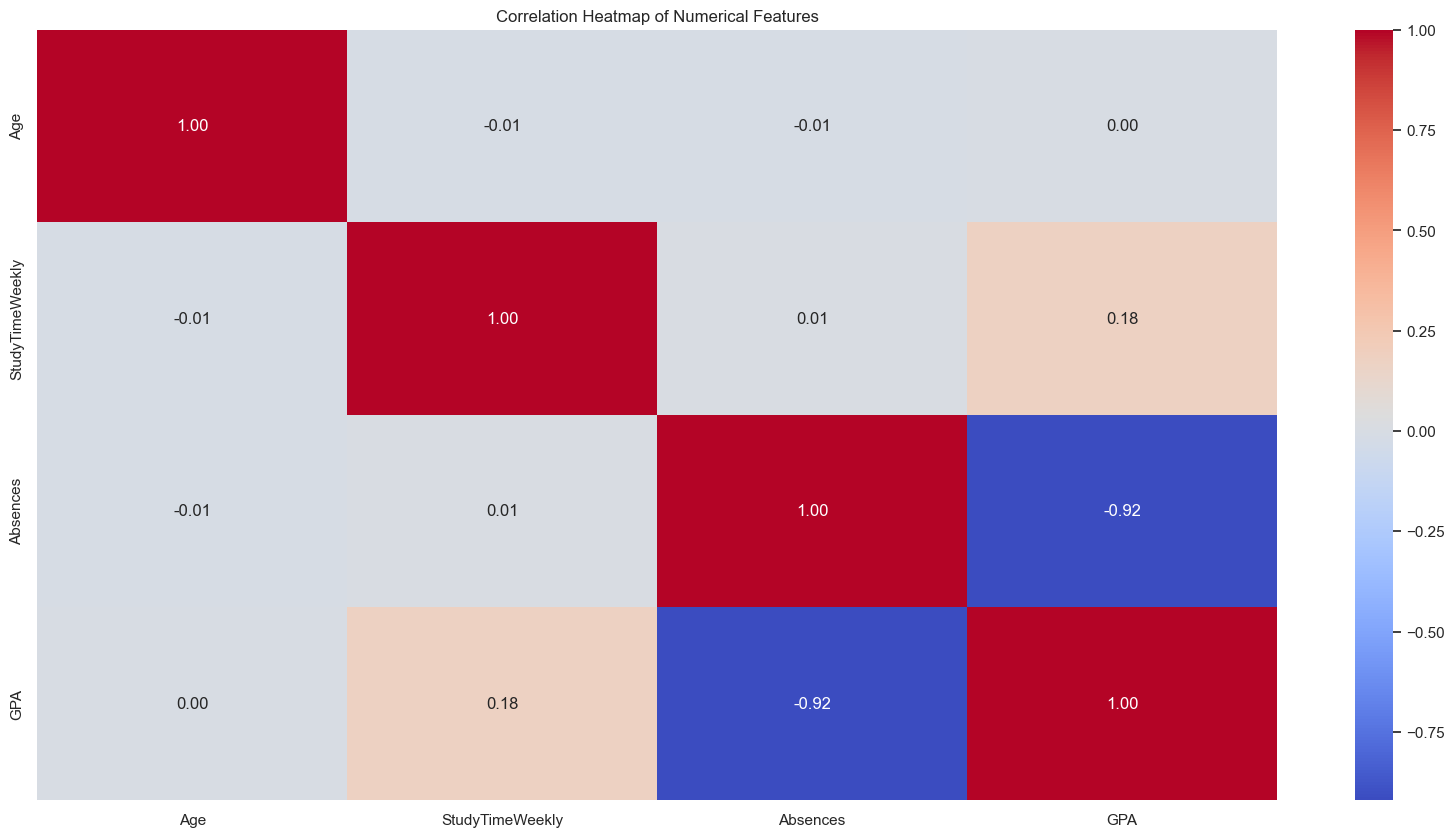

In [395]:
numerical_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Missing value and outlier treatment: Misssing value treatment

In [396]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 StudentID                 0
Age                       0
Gender                    0
Ethnicity                 0
ParentalEducation         0
StudyTimeWeekly           0
Absences                  0
Tutoring                  0
ParentalSupport           0
Extracurricular           0
Sports                    0
Music                     0
Volunteering              0
GPA                       0
GradeClass                0
GenderLabel               0
EthnicityLabel            0
ParentalEducationLabel    0
ParentalSupportLabel      0
TutoringLabel             0
ExtracurricularLabel      0
SportsLabel               0
MusicLabel                0
VolunteeringLabel         0
GradeClassLabel           0
dtype: int64


Missing value and outlier treatment: Outlier Detection and Treatment

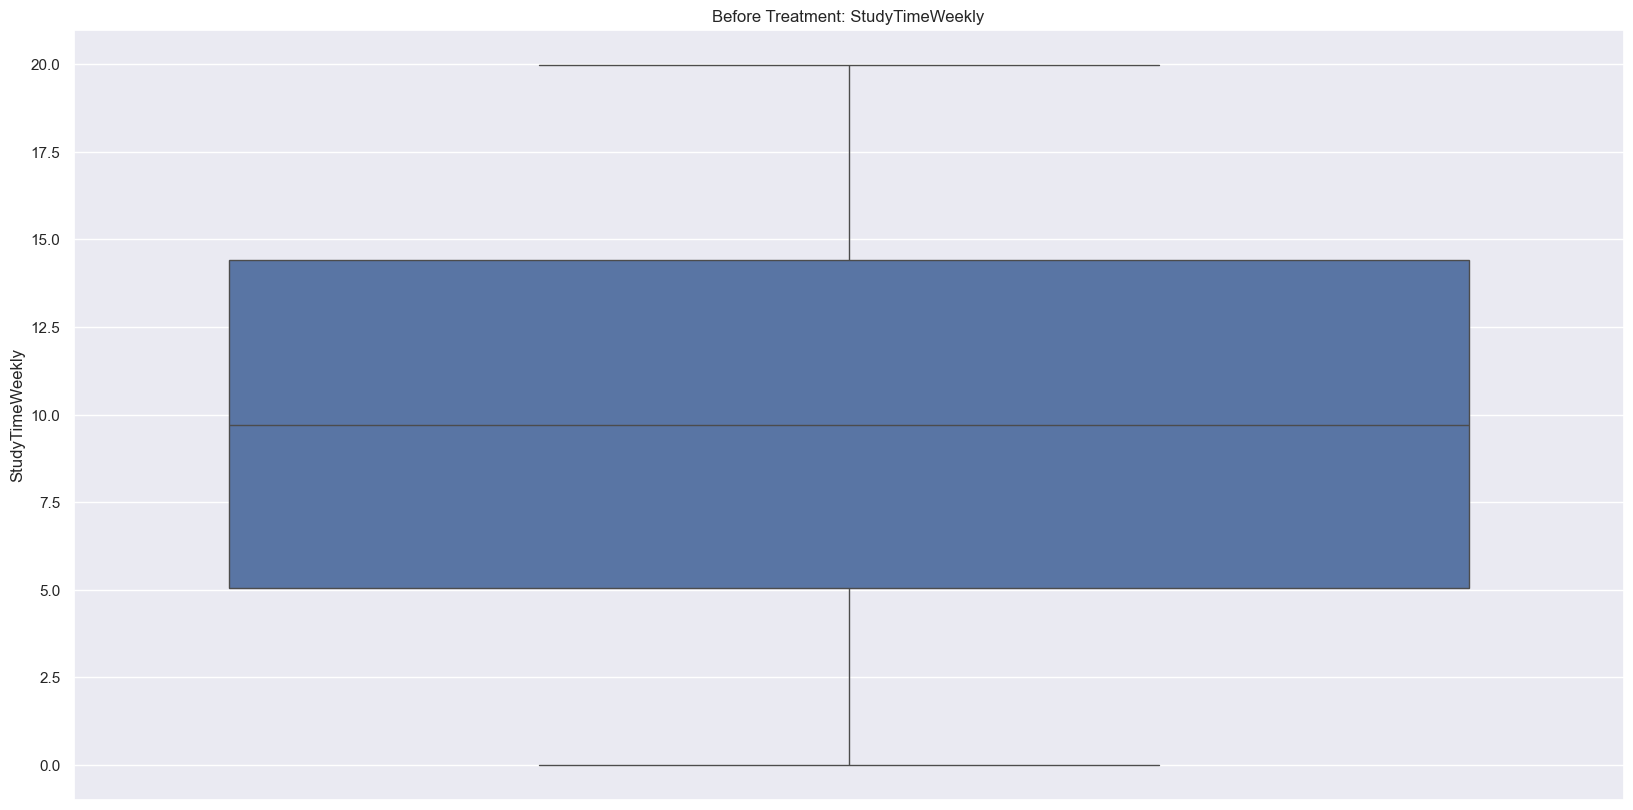


StudyTimeWeekly — Outliers Detected: 0
Lower Bound: 0.00, Upper Bound: 28.46


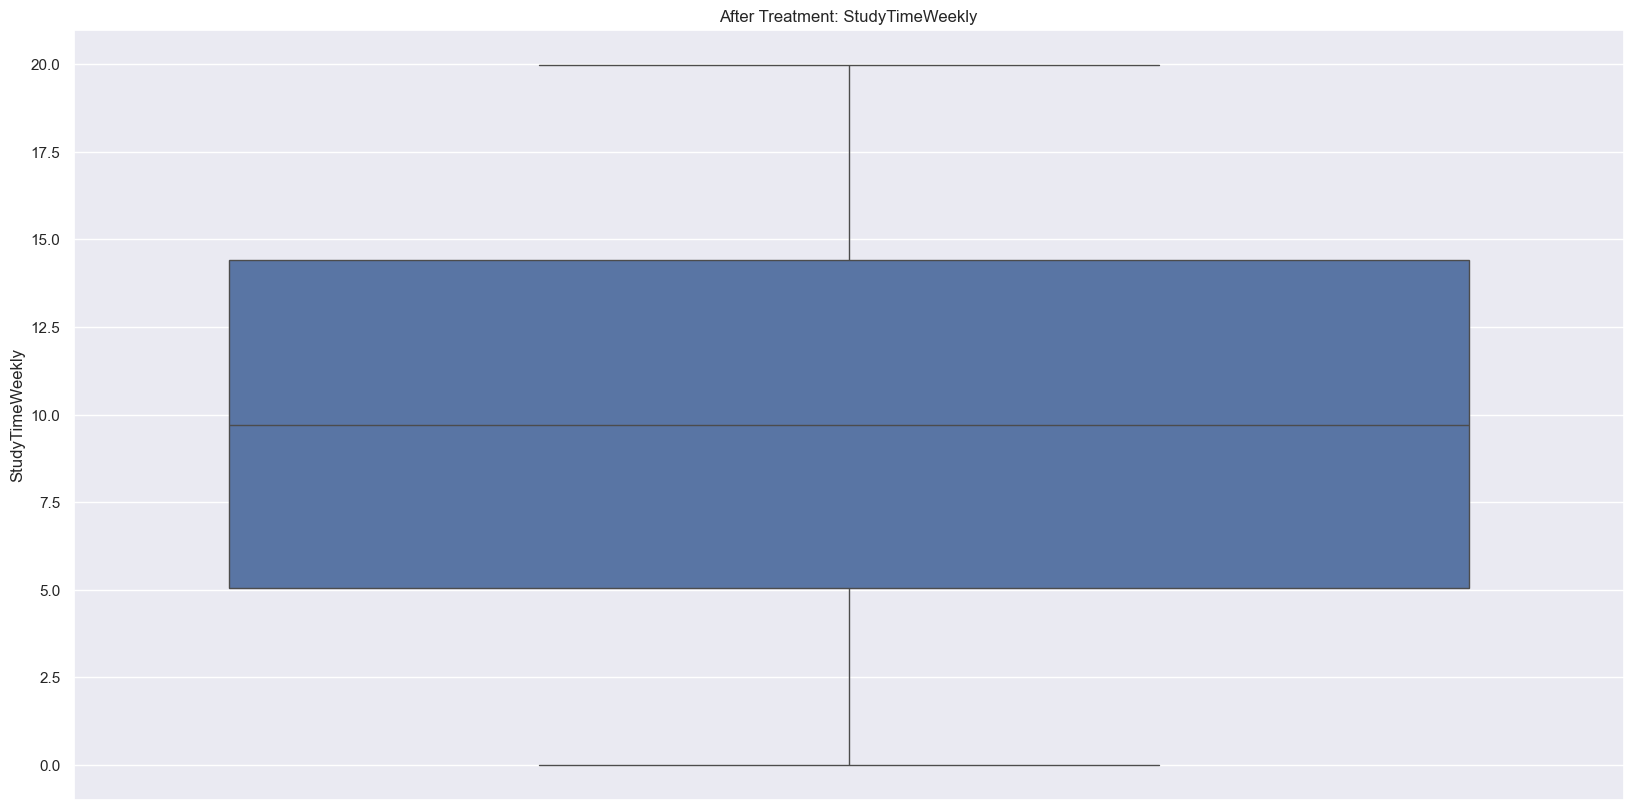

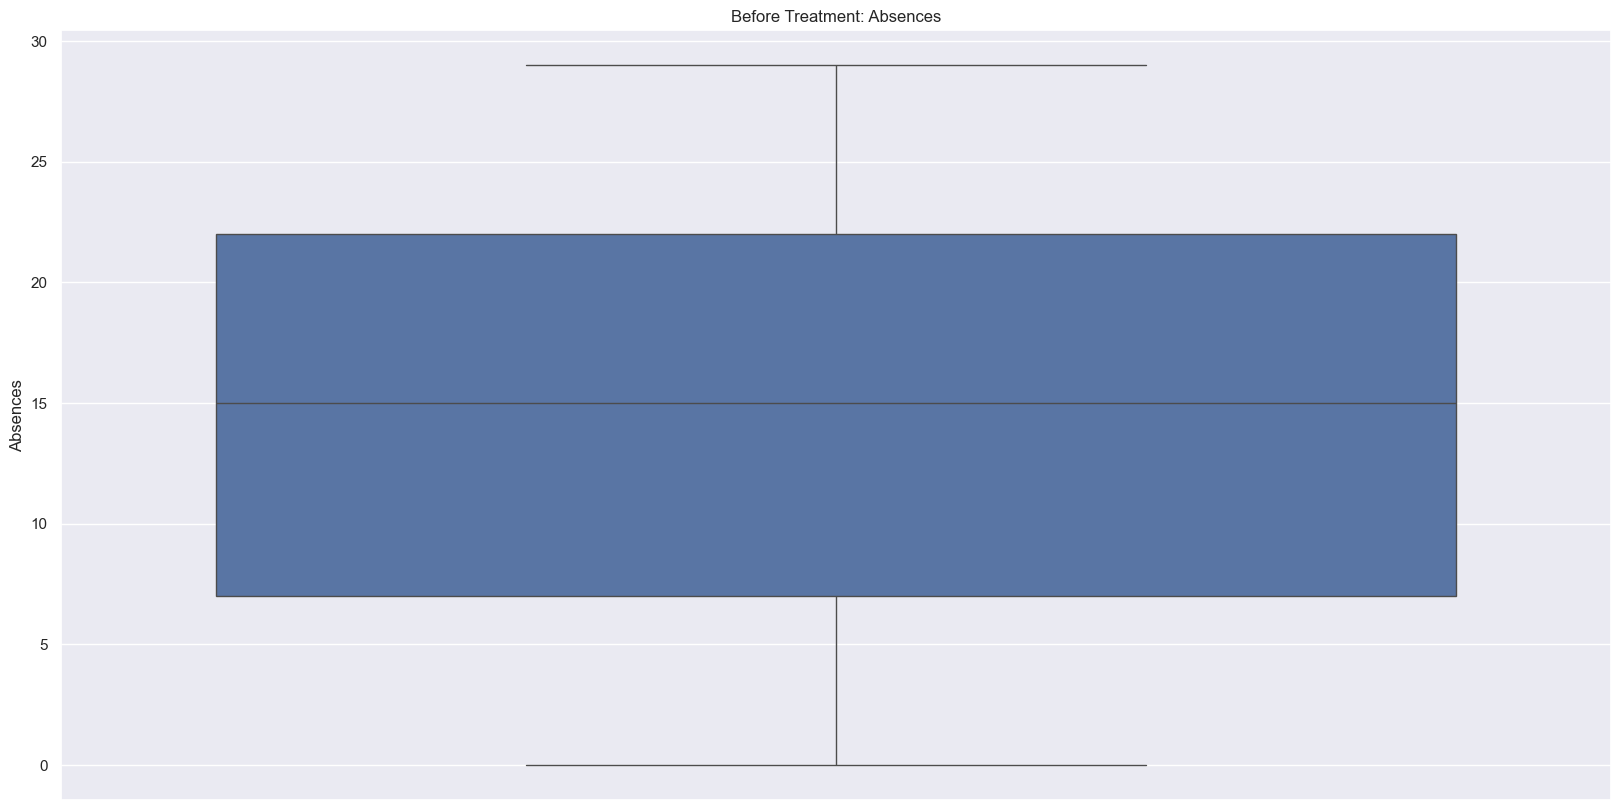


Absences — Outliers Detected: 0
Lower Bound: 0.00, Upper Bound: 44.50


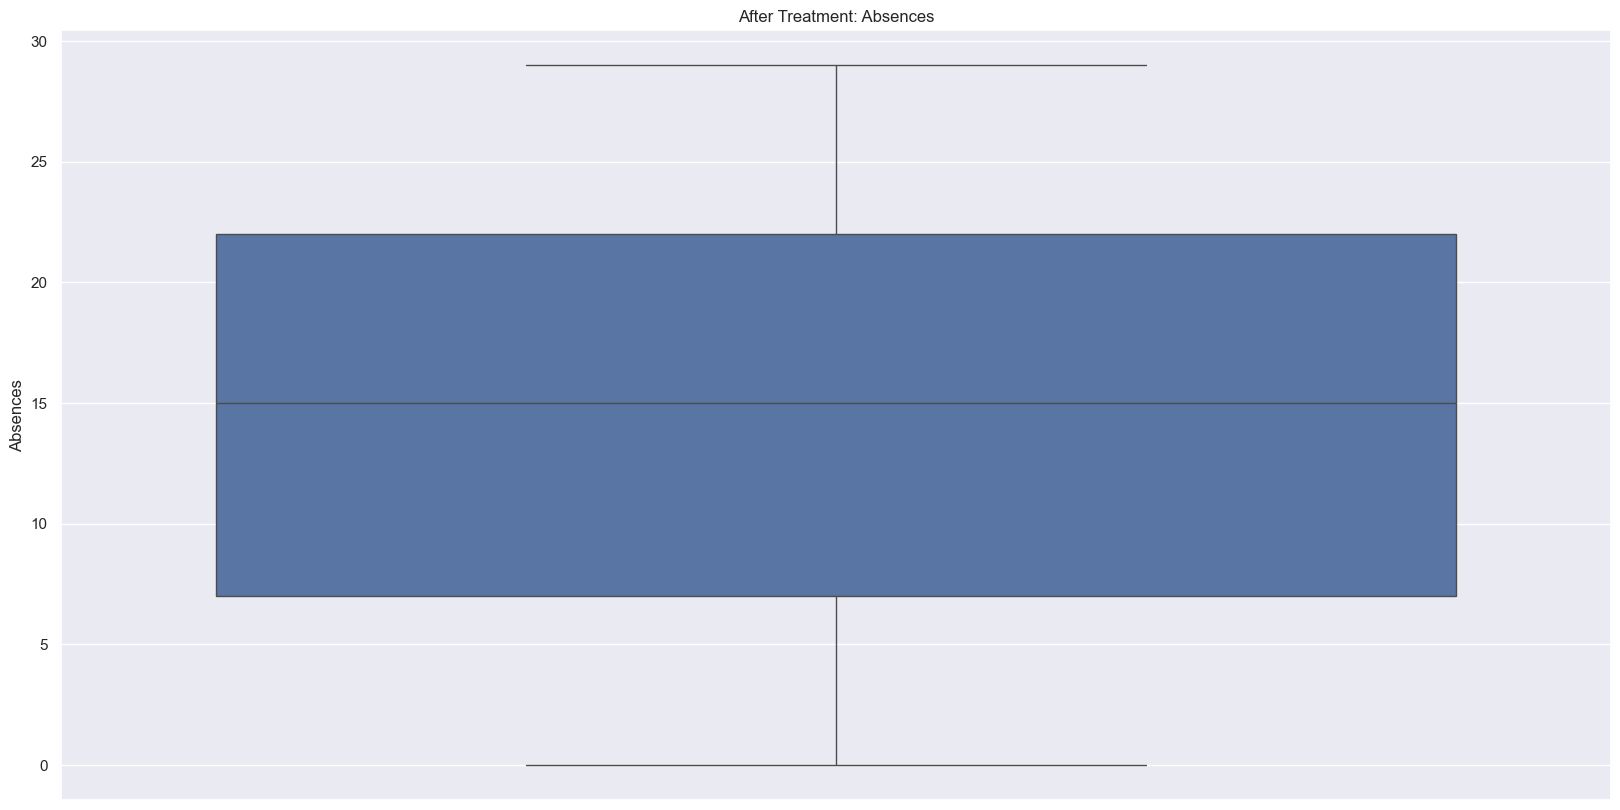

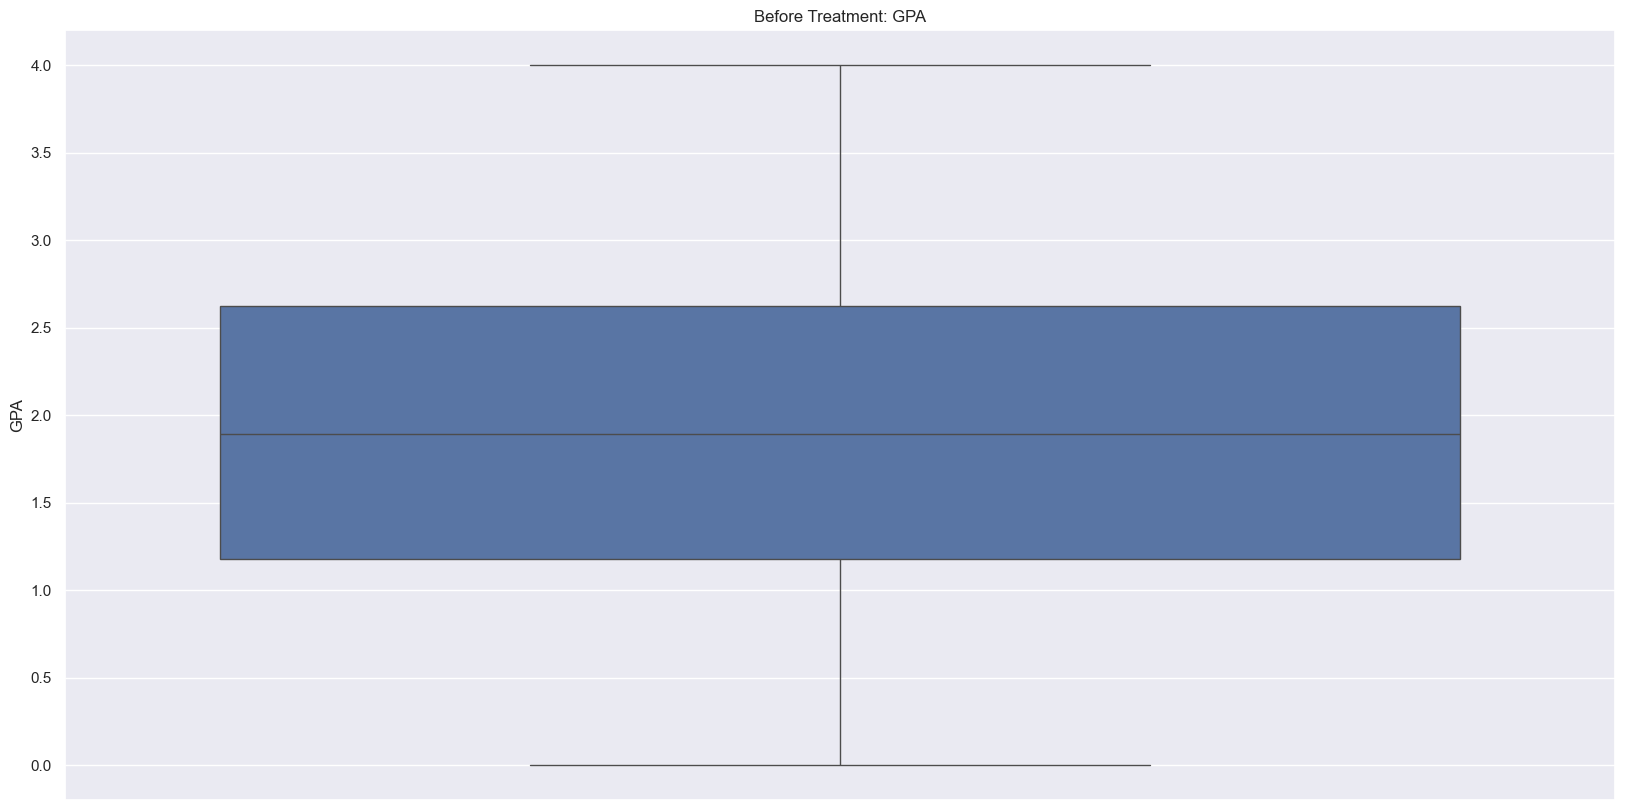


GPA — Outliers Detected: 0
Lower Bound: 0.00, Upper Bound: 4.79


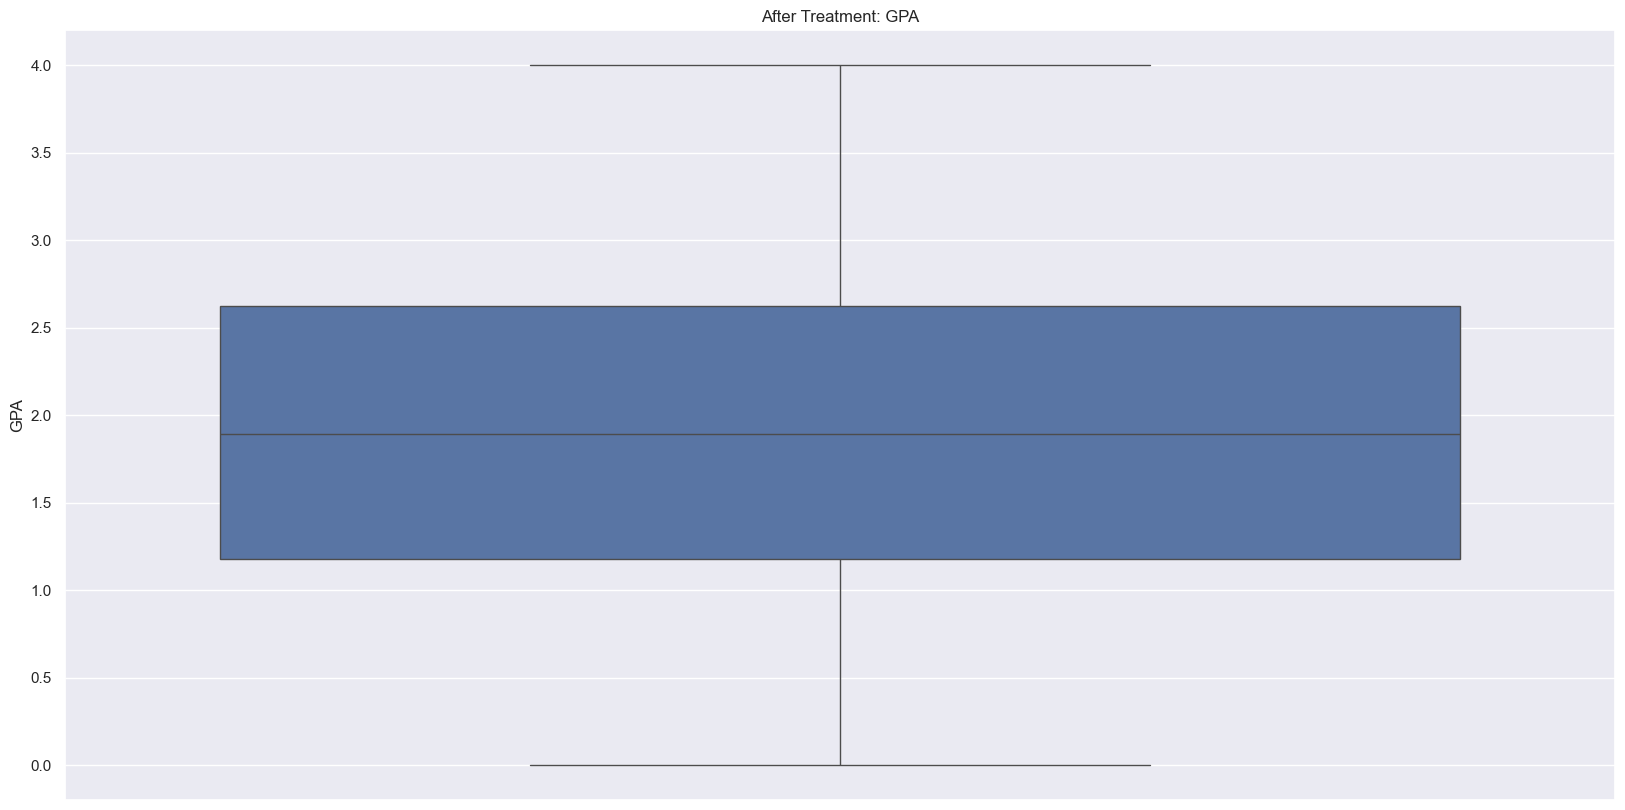

In [397]:
# Function to detect and cap outliers using IQR method
def iqr_treatment(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(0, Q1 - 1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR
    
    # Print info
    print(f"\n{column} — Outliers Detected: {df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    
    # Cap outliers
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Columns to treat
columns_to_treat = ['StudyTimeWeekly', 'Absences', 'GPA']

# Apply the treatment and visualize before/after
for col in columns_to_treat:
    # Before
    sns.boxplot(y=df[col])
    plt.title(f'Before Treatment: {col}')
    plt.show()
    
    # Apply IQR treatment
    df = iqr_treatment(df, col)
    
    # After
    sns.boxplot(y=df[col])
    plt.title(f'After Treatment: {col}')
    plt.show()

    #No outliers detected

Data Cleaning

In [398]:
#make all columns lowercase
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("\n Normalized column names:", list(df.columns))


 Normalized column names: ['studentid', 'age', 'gender', 'ethnicity', 'parentaleducation', 'studytimeweekly', 'absences', 'tutoring', 'parentalsupport', 'extracurricular', 'sports', 'music', 'volunteering', 'gpa', 'gradeclass', 'genderlabel', 'ethnicitylabel', 'parentaleducationlabel', 'parentalsupportlabel', 'tutoringlabel', 'extracurricularlabel', 'sportslabel', 'musiclabel', 'volunteeringlabel', 'gradeclasslabel']


In [399]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n Found {duplicates} duplicate rows.")
df = df.drop_duplicates()


 Found 0 duplicate rows.


In [400]:
#Drop unneccessary columns that do not fit a purpose
df = df.drop(columns=["studentid", 
        "gender_label", "ethnicity_label", "parentaleducation_label",
        "parentalsupportlabel", "tutoringlabel", "extracurricularlabel",
        "sportslabel", "musiclabel", "volunteeringlabel", "gradeclasslabel", "genderlabel", "ethnicitylabel",
        "parentaleducationlabel"], errors="ignore")

In [401]:
df.head()

,age,gender,ethnicity,parentaleducation,studytimeweekly,absences,tutoring,parentalsupport,extracurricular,sports,music,volunteering,gpa,gradeclass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


7.Evaluation Metrics for classification problem

In [402]:
# Example predictions
#y_true = y_test  # actual GradeClass
#y_pred = model.predict(X_test)  # predicted GradeClass

# Accuracy
#accuracy = accuracy_score(y_true, y_pred)
#print(f"Accuracy: {accuracy:.2f}")

# Precision, Recall, F1
#print("Classification Report:")
#print(classification_report(y_true, y_pred, target_names=['A', 'B', 'C', 'D', 'F']))

# Confusion matrix
#cm = confusion_matrix(y_true, y_pred)
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#            xticklabels=['A', 'B', 'C', 'D', 'F'],
#            yticklabels=['A', 'B', 'C', 'D', 'F'])
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.title('Confusion Matrix')
#plt.show()

In [403]:
print(df.dtypes)
# Observation: # Gender, Ethnicity, Parental Education, Tutoring, Parental Support, Extracurricular, Sports, Music, GradeClass and
# Volunteering are categorical data

age                    int64
gender                 int64
ethnicity              int64
parentaleducation      int64
studytimeweekly      float64
absences               int64
tutoring               int64
parentalsupport        int64
extracurricular        int64
sports                 int64
music                  int64
volunteering           int64
gpa                  float64
gradeclass             int64
dtype: object


In [404]:
import pandas as pd

# Map raw numerical codes to readable category names
ethnicity_map = {
    0: "Caucasian",
    1: "AfricanAmerican",
    2: "Asian",
    3: "Other"
}

parentaleducation_map = {
    0: "None",
    1: "HighSchool",
    2: "SomeCollege",
    3: "Bachelors",
    4: "HigherStudy"
}

gender_map = {
    0: "Male",
    1: "Female"
}

# Apply the mappings
df['ethnicity'] = df['ethnicity'].map(ethnicity_map)
df['parentaleducation'] = df['parentaleducation'].map(parentaleducation_map)
df['gender'] = df['gender'].map(gender_map)

# One-hot encode categorical columns
categorical_cols = [
    "gender", "ethnicity", "parentaleducation", "tutoring",
    "parentalsupport", "extracurricular", "sports", "music", "volunteering"
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# Convert booleans to integers (optional, if needed)
df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes('bool').columns})

# Done — check the result
print("Encoded DataFrame shape:", df_encoded.shape)
print("Encoded columns:", df_encoded.columns.tolist())
df_encoded.head()

Encoded DataFrame shape: (2392, 31)
Encoded columns: ['age', 'studytimeweekly', 'absences', 'gpa', 'gradeclass', 'gender_Female', 'gender_Male', 'ethnicity_AfricanAmerican', 'ethnicity_Asian', 'ethnicity_Caucasian', 'ethnicity_Other', 'parentaleducation_Bachelors', 'parentaleducation_HighSchool', 'parentaleducation_HigherStudy', 'parentaleducation_None', 'parentaleducation_SomeCollege', 'tutoring_0', 'tutoring_1', 'parentalsupport_0', 'parentalsupport_1', 'parentalsupport_2', 'parentalsupport_3', 'parentalsupport_4', 'extracurricular_0', 'extracurricular_1', 'sports_0', 'sports_1', 'music_0', 'music_1', 'volunteering_0', 'volunteering_1']


,age,studytimeweekly,absences,gpa,gradeclass,gender_Female,gender_Male,ethnicity_AfricanAmerican,ethnicity_Asian,ethnicity_Caucasian,...,parentalsupport_3,parentalsupport_4,extracurricular_0,extracurricular_1,sports_0,sports_1,music_0,music_1,volunteering_0,volunteering_1
0,17,19.833723,7,2.929196,2,1,0,0,0,1,...,0,0,1,0,1,0,0,1,1,0
1,18,15.408756,0,3.042915,1,0,1,0,0,1,...,0,0,1,0,1,0,1,0,1,0
2,15,4.210570,26,0.112602,4,0,1,0,1,0,...,0,0,1,0,1,0,1,0,1,0
3,17,10.028829,14,2.054218,3,1,0,0,0,1,...,1,0,0,1,1,0,1,0,1,0
4,17,4.672495,17,1.288061,4,1,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0


Part 9: Model Building - Baseline Models

In [405]:
# Data preprocessing
X = df_encoded.drop("gradeclass", axis=1)
y = df_encoded["gradeclass"]

In [406]:
from sklearn.model_selection import train_test_split

# Split before scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [407]:
from sklearn.preprocessing import StandardScaler
import joblib, os

artifacts_dir = "../MLG382Project1/artifacts"
os.makedirs(artifacts_dir, exist_ok=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, os.path.join(artifacts_dir, "scaler.pkl"))

['../MLG382Project1/artifacts\\scaler.pkl']

In [408]:
# Train models

In [409]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 1. Logistic Regression
model_1 = LogisticRegression(max_iter=1000)
model_1.fit(X_train_scaled, y_train)
model_1_predicted = model_1.predict(X_test_scaled)

# 2. Random Forest 
model_2 = RandomForestClassifier(random_state=42)
model_2.fit(X_train, y_train)
model_2_predicted = model_2.predict(X_test)

# 3. XGBoost 
model_3 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model_3.fit(X_train, y_train)
model_3_predicted = model_3.predict(X_test)

c:\Users\jeane\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:55:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [410]:
import os
import joblib

artifacts_dir = os.path.join("..", "MLG382Project1", "artifacts")
os.makedirs(artifacts_dir, exist_ok=True)

# Save models
joblib.dump(model_1, os.path.join(artifacts_dir, "model_1.pkl"))
joblib.dump(model_2, os.path.join(artifacts_dir, "model_2.pkl"))
joblib.dump(model_3, os.path.join(artifacts_dir, "model_3.pkl"))

['..\\MLG382Project1\\artifacts\\model_3.pkl']

In [411]:
#evaluating the models
def evaluate_model(model_name, y_true, y_pred):
    print(f"\nEvaluation for {model_name}")
    acc = accuracy_score(y_true, y_pred)
    print("Accuracy:", round(acc, 4))
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=['A', 'B', 'C', 'D', 'F']))
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', #cmap, annotate, format='decimal', color_map
                xticklabels=['A', 'B', 'C', 'D', 'F'], 
                yticklabels=['A', 'B', 'C', 'D', 'F'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


Evaluation for Logistic Regression
Accuracy: 0.9186
Classification Report:
              precision    recall  f1-score   support

           A       0.90      0.60      0.72        15
           B       0.78      0.82      0.80        49
           C       0.83      0.84      0.84        77
           D       0.88      0.89      0.89        83
           F       0.98      0.99      0.99       255

    accuracy                           0.92       479
   macro avg       0.88      0.83      0.85       479
weighted avg       0.92      0.92      0.92       479



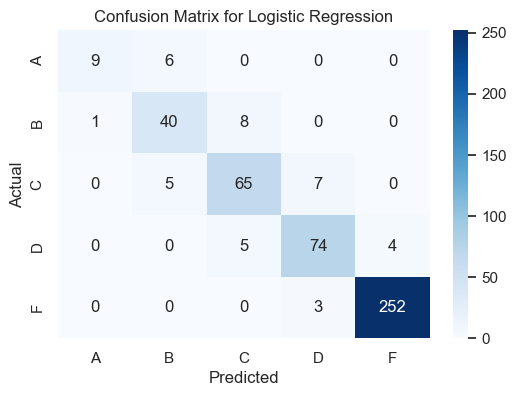


Evaluation for Random Forest
Accuracy: 0.9791
Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.53      0.70        15
           B       0.87      0.96      0.91        49
           C       0.97      0.99      0.98        77
           D       0.99      1.00      0.99        83
           F       1.00      1.00      1.00       255

    accuracy                           0.98       479
   macro avg       0.97      0.90      0.92       479
weighted avg       0.98      0.98      0.98       479



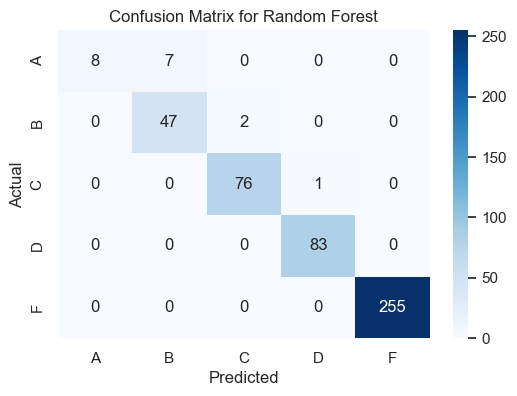


Evaluation for XGBoost
Accuracy: 0.9937
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        15
           B       1.00      0.96      0.98        49
           C       0.97      1.00      0.99        77
           D       1.00      0.99      0.99        83
           F       1.00      1.00      1.00       255

    accuracy                           0.99       479
   macro avg       0.99      0.99      0.99       479
weighted avg       0.99      0.99      0.99       479



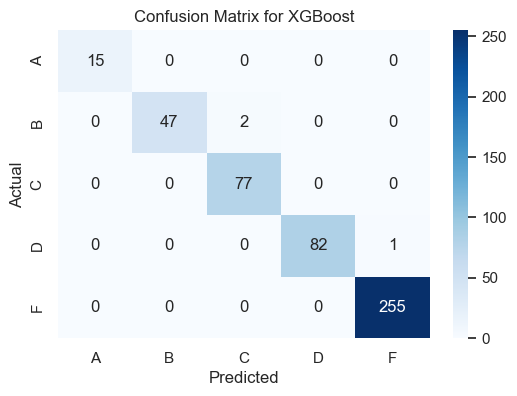

In [412]:
evaluate_model("Logistic Regression", y_test, model_1_predicted)
evaluate_model("Random Forest", y_test, model_2_predicted)
evaluate_model("XGBoost", y_test, model_3_predicted)

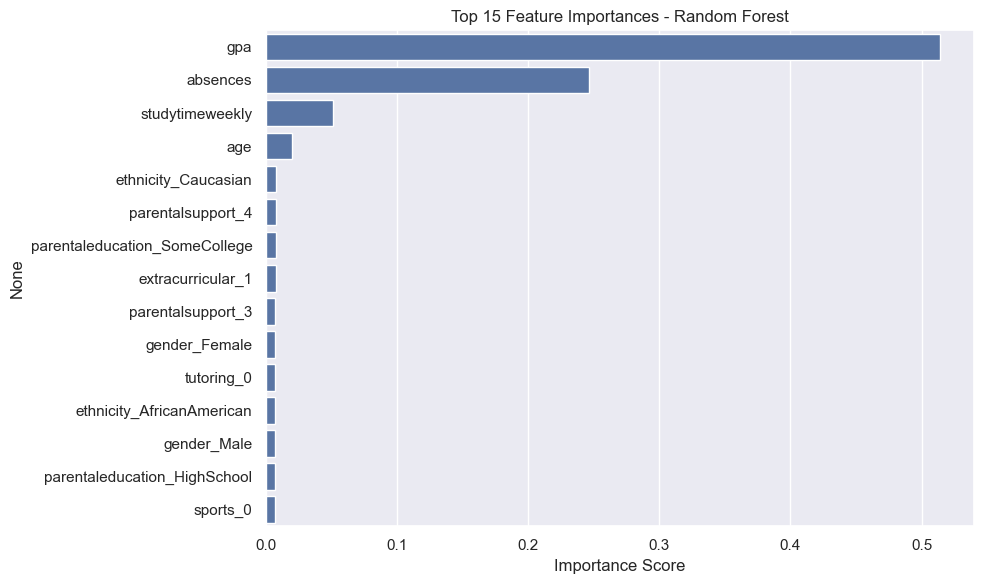

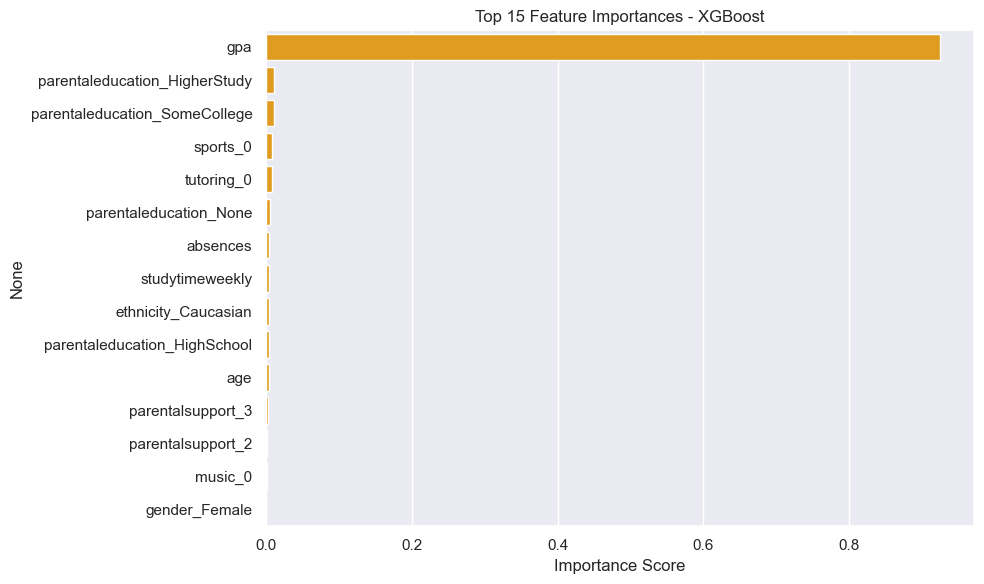

In [413]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance for Random Forest
rf_importances = pd.Series(model_2.feature_importances_, index=X.columns)
rf_top_features = rf_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_top_features.values, y=rf_top_features.index)
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Feature Importance for XGBoost=
xgb_importances = pd.Series(model_3.feature_importances_, index=X.columns)
xgb_top_features = xgb_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_top_features.values, y=xgb_top_features.index, color='orange')
plt.title("Top 15 Feature Importances - XGBoost")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [414]:
# Save full feature importances to file
rf_importances.to_csv("../MLG382Project1/artifacts/rf_feature_importance.csv")
xgb_importances.to_csv("../MLG382Project1/artifacts/xgb_feature_importance.csv")


Part 9: Model Building - Deep Learning Model

Epoch 1/20


c:\Users\jeane\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4206 - loss: 1.4666 - val_accuracy: 0.5170 - val_loss: 1.1355
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5770 - loss: 1.1121 - val_accuracy: 0.5535 - val_loss: 0.9763
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5992 - loss: 0.9705 - val_accuracy: 0.6057 - val_loss: 0.8685
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6419 - loss: 0.8434 - val_accuracy: 0.6658 - val_loss: 0.7797
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6594 - loss: 0.8267 - val_accuracy: 0.7023 - val_loss: 0.7155
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6880 - loss: 0.7173 - val_accuracy: 0.7493 - val_loss: 0.6566
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7239 - loss: 0.6591 - val_accuracy: 0.7755 - val_loss: 0.6075
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7625 - loss: 0.6063 - val_accuracy: 0.7911 - val_loss: 0.5688
Epo

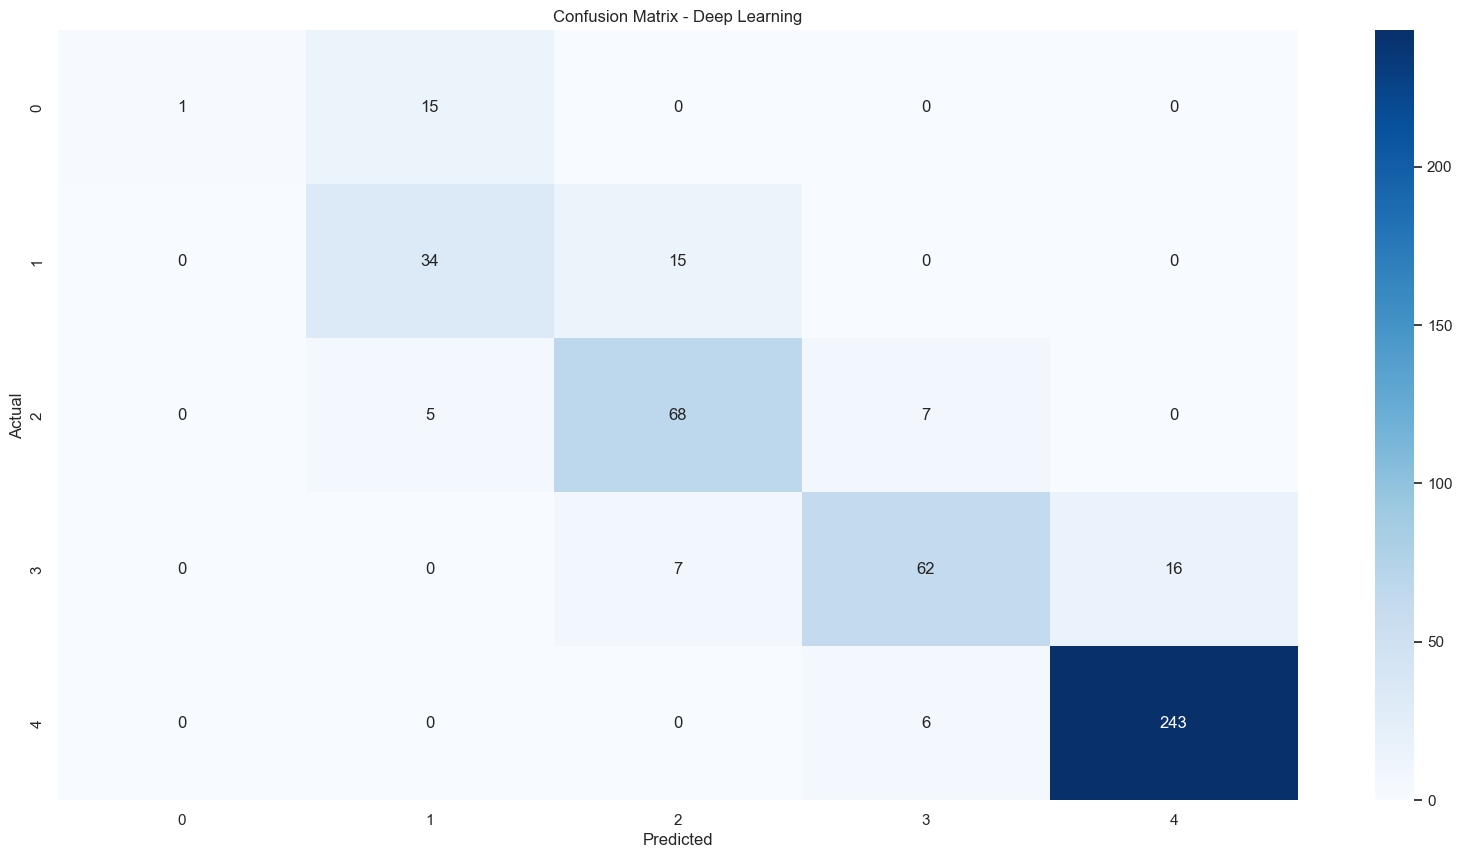

<Figure size 2000x1000 with 0 Axes>

In [415]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Data split
X = df_encoded.drop("gradeclass", axis=1)
y = df_encoded["gradeclass"]

from sklearn.model_selection import train_test_split
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_dl = scaler.fit_transform(X_train_dl) 
X_test_dl = scaler.transform(X_test_dl)  

# Encode target as one-hot
num_classes = y.nunique()
y_train_dl_cat = to_categorical(y_train_dl, num_classes=num_classes)
y_test_dl_cat = to_categorical(y_test_dl, num_classes=num_classes)

# Build model
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_dl.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')  # Use softmax for multi-class
])

# Compile
dl_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
dl_model.fit(X_train_dl, y_train_dl_cat, epochs=20, batch_size=32, validation_split=0.2)

# Predict
y_pred_probs = dl_model.predict(X_test_dl)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_dl_cat, axis=1)

# Classification report
print(classification_report(y_true, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Deep Learning')
plt.show()

# Save model
dl_model.save("../MLG382Project1/artifacts/model_4.keras")

plt.tight_layout()

import os

# Ensure the assets directory exists
assets_dir = "../MLG382Project1/src/assets"
os.makedirs(assets_dir, exist_ok=True)

# Save the confusion matrix image
plt.tight_layout()
plt.savefig(os.path.join(assets_dir, "cm_dl.png"))
plt.show()

In [416]:
import pandas as pd

preds_df = pd.DataFrame({
    "Actual": y_test.reset_index(drop=True),
    "Logistic Regression": model_1_predicted,
    "Random Forest": model_2.predict(X_test),
    "XGBoost": model_3.predict(X_test),
    "Deep Learning": y_pred_classes
})

preds_df.to_csv("../MLG382Project1/artifacts/predictions.csv", index=False)

In [417]:
import joblib

# Save the column names of the final training feature matrix
X_columns = list(X.columns)

# Save to artifacts directory
joblib.dump(X_columns, "../MLG382Project1/artifacts/X_columns.pkl")


['../MLG382Project1/artifacts/X_columns.pkl']

In [418]:
import joblib
import os

# Save the column names of the final training feature matrix
X_columns = list(X.columns)

# Ensure artifacts directory exists
artifacts_path = "../MLG382Project1/artifacts"
os.makedirs(artifacts_path, exist_ok=True)

# Save column names to .pkl file
joblib.dump(X_columns, os.path.join(artifacts_path, "X_columns.pkl"))

print(f"Saved feature column names to {os.path.join(artifacts_path, 'X_columns.pkl')}")

Saved feature column names to ../MLG382Project1/artifacts\X_columns.pkl
